# **Predicting Protein Family from Protein Sequence**

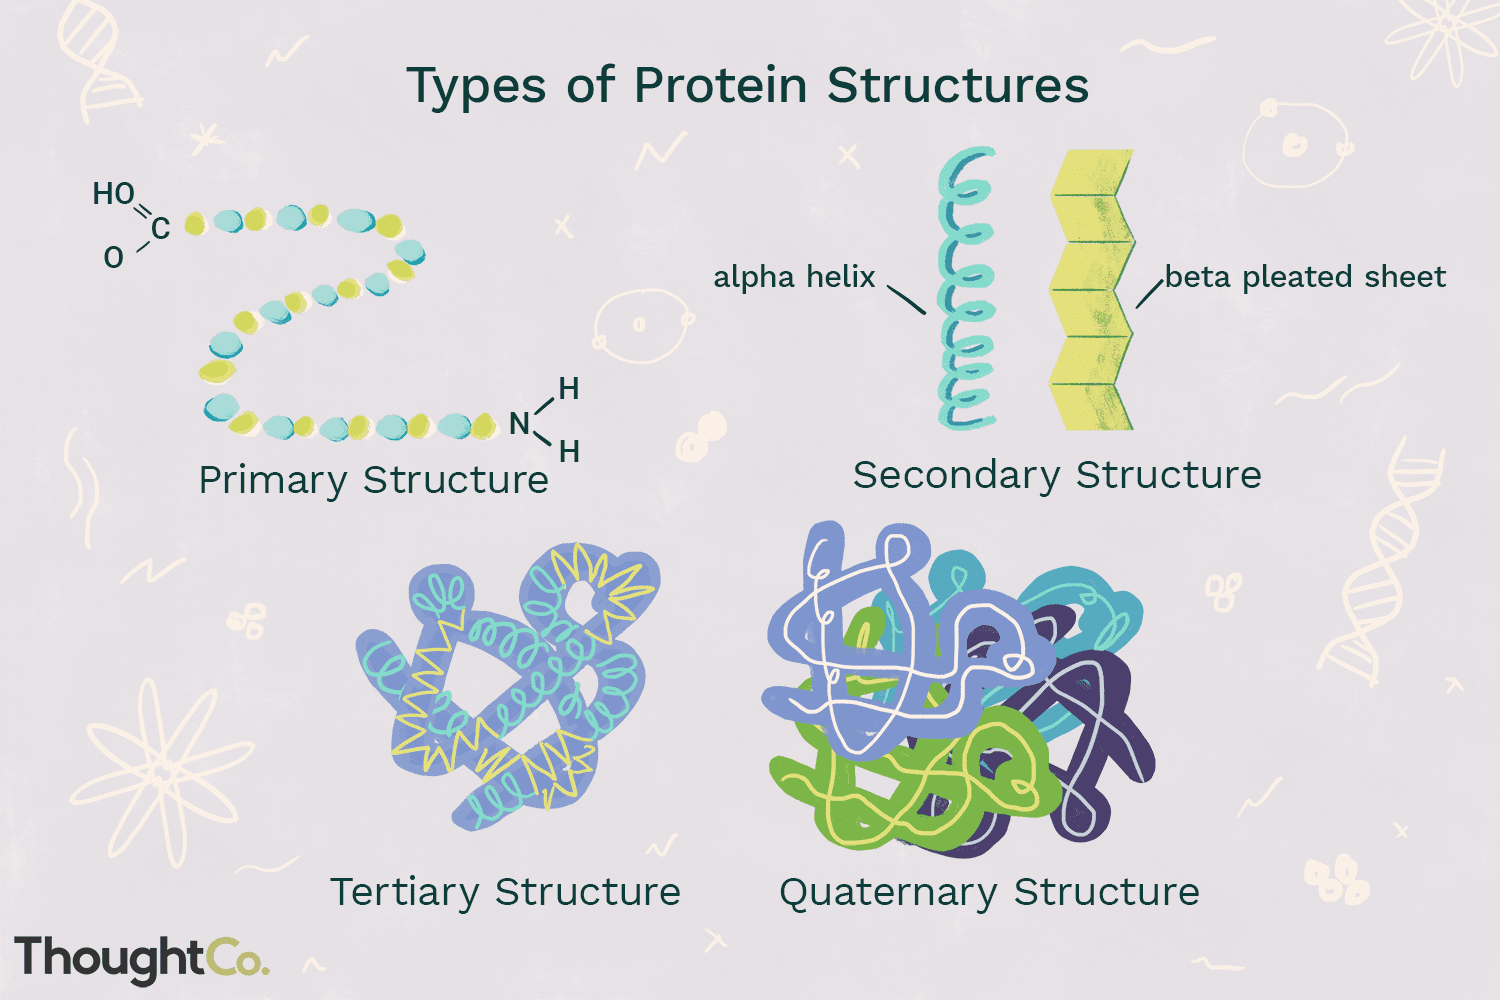

# **📌Problem Statement**

Develop a machine learning model that can accurately classify protein structures based on their meta-data and sequence information, using the provided dataset from the RCSB Protein Data Bank (PDB) available on kaggle.


## **What are protein sequences?** 🙋‍♀️


Protein sequences represent the linear arrangement of amino acids within a protein, and they play a fundamental role in determining the structure, function, and interactions of proteins.

Here are some key points to understand about protein sequences:

🧬**Amino Acids:**
Proteins are composed of building blocks called amino acids. There are 20 standard amino acids that can be found in protein sequences, each with its own unique chemical properties. The order and combination of these amino acids determine the specific characteristics and behavior of a protein.


🧬**One-Letter Codes:**
To represent amino acids in protein sequences, a one-letter code is often used. For example, "A" represents alanine, "C" represents cysteine, and "L" represents leucine. This condensed representation allows for easier handling and analysis of protein sequences.


🧬**Primary Structure:**
 The primary structure of a protein refers to the specific sequence of amino acids that make up the protein chain. This sequence is encoded in the DNA sequence of the gene that codes for the protein. The primary structure is critical because it ultimately determines the protein's folding pattern and its resulting three-dimensional structure.


🧬**Secondary Structure:**
The primary sequence of amino acids influences the formation of secondary structures in proteins. Secondary structures, such as alpha-helices and beta-sheets, arise from the regular patterns of hydrogen bonding between nearby amino acids. These structures contribute to the overall folding and stability of the protein.

🧬**Tertiary and Quaternary Structures:**
Proteins can fold into complex three-dimensional structures called tertiary structures. Tertiary structure is determined by various interactions, including hydrogen bonds, disulfide bridges, and hydrophobic interactions. In some cases, multiple protein chains come together to form a functional unit known as the quaternary structure.


🧬**Function and Interactions:**
The sequence of amino acids in a protein influences its function and interactions with other molecules. Specific amino acid residues within the sequence can be critical for binding to ligands, catalyzing reactions, or participating in signaling pathways.

As a data scientist, you may work with protein sequences by leveraging various computational tools, algorithms, and machine learning techniques. These can include sequence alignment algorithms, protein structure prediction methods, and classification models trained on protein sequence data. Understanding protein sequences and their role in protein structure and function will enable you to effectively analyze and interpret biological data, contributing to advancements in fields such as drug discovery, disease research, and bioinformatics.

## **What is a protein family?** 👨‍👩‍👧‍👧

 A protein family is defined based on sequence similarity, structural similarity, and functional similarity among its members. Proteins within the same family usually have a common evolutionary origin and share a significant degree of sequence or structural similarity.
 Proteins in the same family often have similar three-dimensional structures or domains. These structural features can be conserved across different organisms, indicating functional importance.
 They may have similar enzymatic activities, participate in the same metabolic pathways, or be involved in specific cellular functions or signaling pathways.
 Protein families are a result of evolutionary processes such as gene duplication, divergence, and selection. Through these processes, new proteins with slight modifications or specialized functions can emerge within a family.

# **My approach to the problem**


# 1. **Download the Dataset**




Install the 'opendatasets' package and downloading the dataset from Kaggle.

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/shahir/protein-data-set'

The opendatasets.download() function is used to download the dataset specified by the dataset_url variable.

In [ ]:
%%time
od.download(dataset_url)

100%|██████████| 27.4M/27.4M [00:00<00:00, 49.1MB/s]



CPU times: user 1.09 s, sys: 342 ms, total: 1.43 s
Wall time: 3.37 s


In [ ]:
data_dir = '/content/protein-data-set'

The ls and head commands are used to list the files in the data_dir directory and display the contents of specific files

The directory has 2 files -` pdb_data_no_dups.csv` and `pdb_data_seq.csv`

In [ ]:
# List of files with size
!ls -lh {data_dir}

total 147M
-rw-r--r-- 1 root root  27M Jul 16 16:37 pdb_data_no_dups.csv
-rw-r--r-- 1 root root 121M Jul 16 16:38 pdb_data_seq.csv


To get a glimpse of the dataset's content, we use the head command. By applying it to the 'pdb_data_no_dups.csv' file, we obtain a snapshot of the structureId, classification, experimentalTechnique, macromoleculeType, and other attributes associated with protein structures.

In [ ]:
# structure dataset
!head {data_dir}/pdb_data_no_dups.csv

structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.9,6360.3,"VAPOR DIFFUSION, HANGING DROP",,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994
101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,,,2.0,38.45,,,1995
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.8,,,3.09,60.2,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, PH 9.0",9.0,1999
102D,DNA,X-RAY DIFFRACTION,DNA,24,2.2,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temperature 277.00K",7.0,1995
102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,,,2.75,55.28,,,1993
102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,,,3.09,60.2,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, PH 9.0",9.0,1999
103D

Similarly, applying the head command to the 'pdb_data_seq.csv' file displays the structureId, chainId, sequence, residueCount, and macromoleculeType of protein sequences.

In [ ]:
# seq dataset
!head {data_dir}/pdb_data_seq.csv

structureId,chainId,sequence,residueCount,macromoleculeType
100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
101D,A,CGCGAATTCGCG,24,DNA
101D,B,CGCGAATTCGCG,24,DNA
101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRVKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG,154,Protein
102D,A,CGCAAATTTGCG,24,DNA
102D,B,CGCAAATTTGCG,24,DNA
102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL,165,Protein
102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKAGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG,154,Protein


In [ ]:
# No. of lines in structure dataset
!wc -l {data_dir}/pdb_data_no_dups.csv

141402 /content/protein-data-set/pdb_data_no_dups.csv


In [ ]:
# No. of lines in Sequence Dataset
!wc -l {data_dir}/pdb_data_seq.csv

467305 /content/protein-data-set/pdb_data_seq.csv


According to our analysis, the 'pdb_data_no_dups.csv' file contains 141,402 protein structures, while the 'pdb_data_seq.csv' file comprises 467,305 protein sequences.



# 2. **Import the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from math import sqrt
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

# 3. **Exploratory Data Analysis**

**Reading the datasets**
The code reads two CSV files, 'pdb_data_no_dups.csv' and 'pdb_data_seq.csv', and stores them in two separate dataframes, 'structure' and 'sequence', respectively.

In [ ]:
structure = pd.read_csv('/content/protein-data-set/pdb_data_no_dups.csv')

In [ ]:
sequence = pd.read_csv('/content/protein-data-set/pdb_data_seq.csv')

he code creates a summary dataframe called 'shape' that provides information about the shape (number of rows and columns) of the 'structure' and 'sequence' datasets.

In [ ]:
shape = pd.DataFrame({'Rows':[structure.shape[0], sequence.shape[0]],
                     'Columns':[structure.shape[1], sequence.shape[1]]},
                  index = ['structure dataset', 'sequence dataset'])
shape

Rows  Columns
structure dataset  141401       14
sequence dataset   467304        5

displaying the first few rows of the 'structure' dataframe

In [ ]:
structure.head()

structureId         classification experimentalTechnique macromoleculeType  \
0        100D         DNA-RNA HYBRID     X-RAY DIFFRACTION    DNA/RNA Hybrid   
1        101D                    DNA     X-RAY DIFFRACTION               DNA   
2        101M       OXYGEN TRANSPORT     X-RAY DIFFRACTION           Protein   
3        102D                    DNA     X-RAY DIFFRACTION               DNA   
4        102L  HYDROLASE(O-GLYCOSYL)     X-RAY DIFFRACTION           Protein   

   residueCount  resolution  structureMolecularWeight  \
0            20        1.90                   6360.30   
1            24        2.25                   7939.35   
2           154        2.07                  18112.80   
3            24        2.20                   7637.17   
4           165        1.74                  18926.61   

           crystallizationMethod  crystallizationTempK  densityMatthews  \
0  VAPOR DIFFUSION, HANGING DROP                   NaN             1.78   
1                            NaN                   NaN             2.00   
2                            NaN                   NaN             3.09   
3  VAPOR DIFFUSION, SITTING DROP                 277.0             2.28   
4                            NaN                   NaN             2.75   

   densityPercentSol                                        pdbxDetails  \
0              30.89             pH 7.00, VAPOR DIFFUSION, HANGING DROP   
1              38.45                                                NaN   
2              60.20  3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...   
3              46.06  pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...   
4              55.28                                                NaN   

   phValue  publicationYear  
0      7.0           1994.0  
1      NaN           1995.0  
2      9.0           1999.0  
3      7.0           1995.0  
4      NaN           1993.0

This line of code provides information about the 'structure' dataframe, including the data types of each column and the number of non-null values.

In [ ]:
structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

This line of code calculates the number of missing values (NaN) in each column of the 'structure' dataframe.

In [ ]:
structure.isna().sum()

structureId                     0
classification                  2
experimentalTechnique           0
macromoleculeType            3765
residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationMethod       45159
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
pdbxDetails                 22867
phValue                     36291
publicationYear             23799
dtype: int64

This line of code generates descriptive statistics of the numerical columns in the 'structure' dataframe, such as count, mean, standard deviation, minimum, and maximum values.

In [ ]:
structure.describe()

residueCount     resolution  structureMolecularWeight  \
count  141401.000000  128589.000000              1.414010e+05   
mean      825.374849       2.263807              1.120790e+05   
std      2136.461080       1.410878              5.690152e+05   
min         0.000000       0.480000              3.143800e+02   
25%       226.000000       1.800000              2.612856e+04   
50%       414.000000       2.100000              4.747779e+04   
75%       820.000000       2.500000              9.408484e+04   
max    313236.000000      70.000000              9.773054e+07   

       crystallizationTempK  densityMatthews  densityPercentSol  \
count          97039.000000    124724.000000      124749.000000   
mean             290.967713         2.670267          51.353163   
std                9.541080         0.783740          10.104561   
min                4.000000         0.000000           0.000000   
25%              290.000000         2.210000          44.370000   
50%              293.000000         2.490000          50.500000   
75%              295.000000         2.910000          57.710000   
max              398.000000        99.000000          92.000000   

             phValue  publicationYear  
count  105110.000000    117602.000000  
mean        6.788685      2008.922365  
std         2.556819         8.459286  
min         0.000000       201.000000  
25%         6.000000      2005.000000  
50%         7.000000      2010.000000  
75%         7.500000      2014.000000  
max       724.000000      2018.000000

we follow the same procedure for sequence dataframe

In [ ]:
sequence.head()

structureId chainId                                           sequence  \
0        100D       A                                         CCGGCGCCGG   
1        100D       B                                         CCGGCGCCGG   
2        101D       A                                       CGCGAATTCGCG   
3        101D       B                                       CGCGAATTCGCG   
4        101M       A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   

   residueCount macromoleculeType  
0            20    DNA/RNA Hybrid  
1            20    DNA/RNA Hybrid  
2            24               DNA  
3            24               DNA  
4           154           Protein

In [ ]:
sequence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        467304 non-null  object
 1   chainId            467294 non-null  object
 2   sequence           467276 non-null  object
 3   residueCount       467304 non-null  int64 
 4   macromoleculeType  432487 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.8+ MB


In [ ]:
sequence.isna().sum()

structureId              0
chainId                 10
sequence                28
residueCount             0
macromoleculeType    34817
dtype: int64

In [ ]:
sequence.describe()

residueCount
count  467304.000000
mean     6173.426620
std     23645.559738
min         0.000000
25%       456.000000
50%      1131.000000
75%      4342.000000
max    313236.000000

using the 'missingno' library to create a matrix visualization of missing values in the 'structure' and 'sequence' dataframes, respectively. This visualization helps identify the presence and patterns of missing data.

<Axes: >

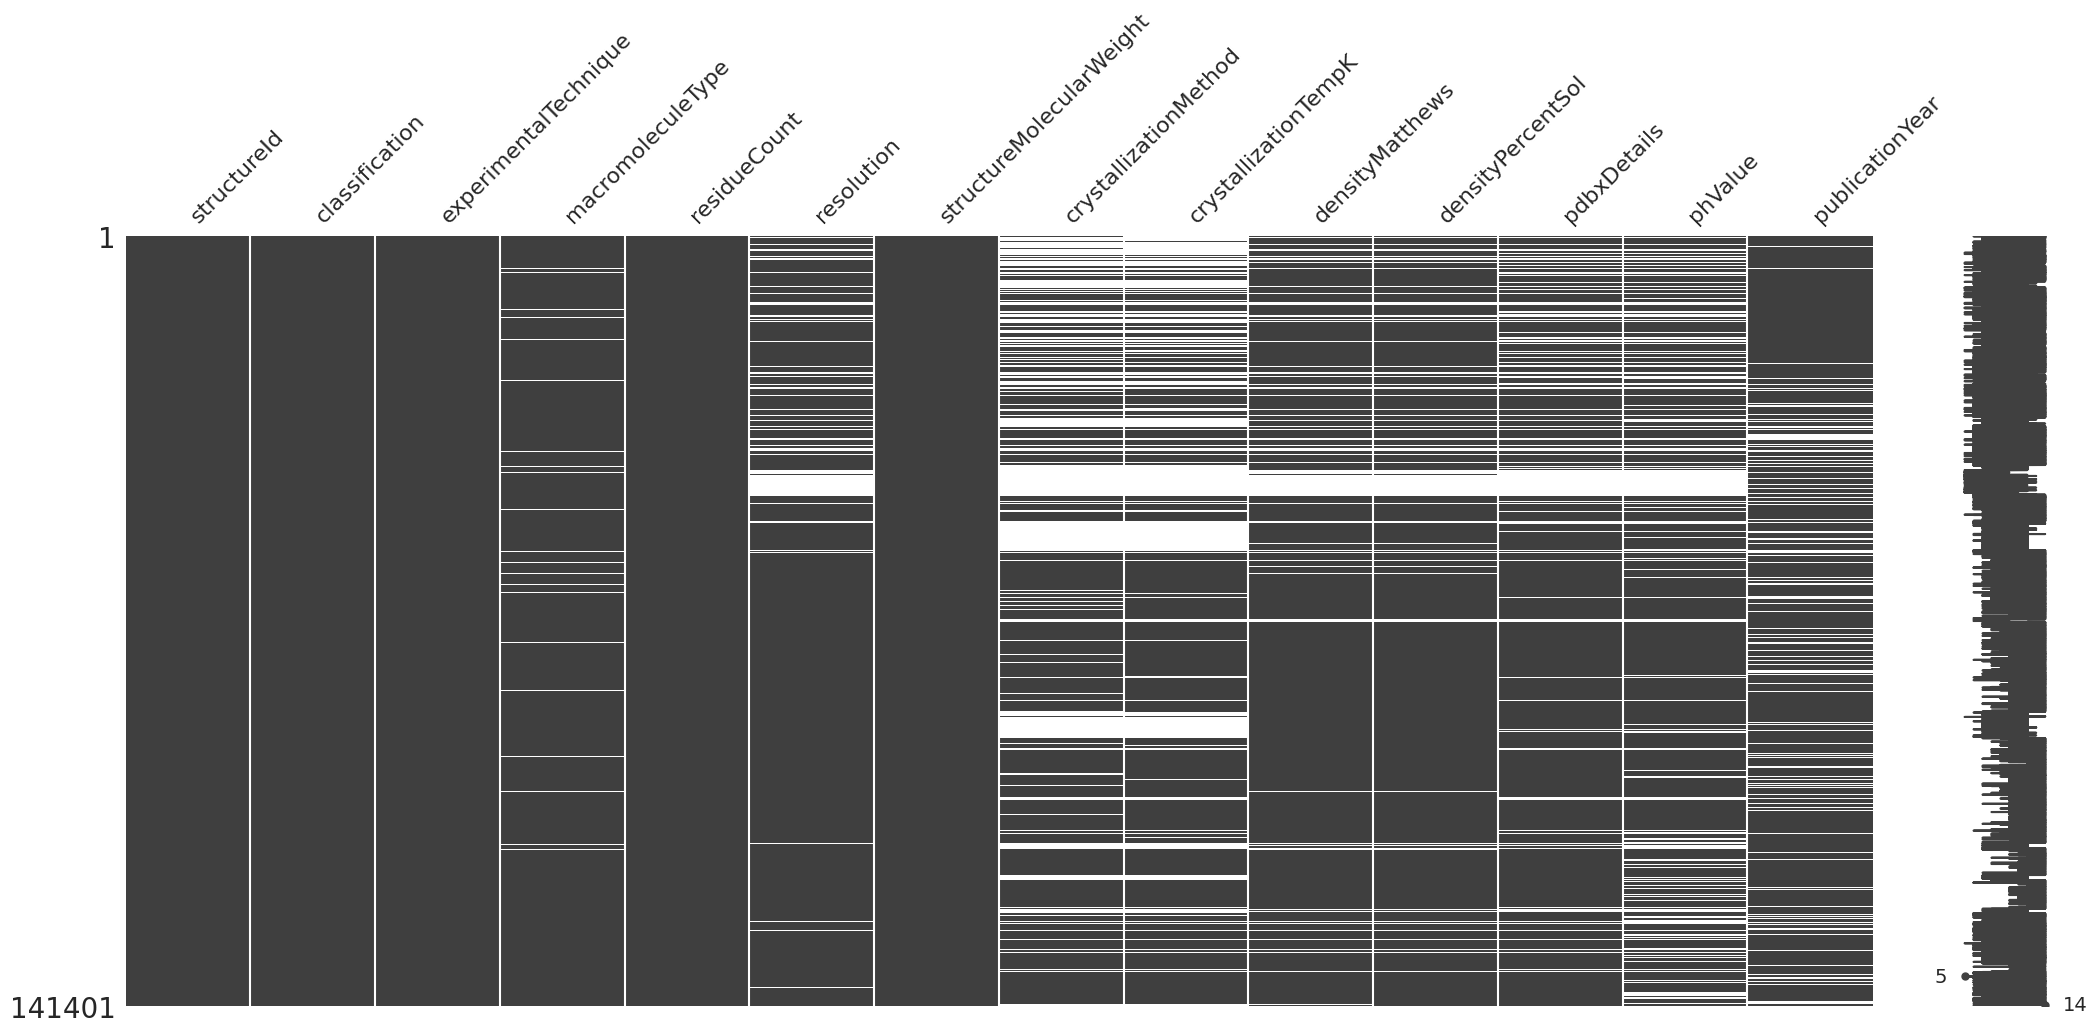

In [ ]:
msno.matrix(structure)

<Axes: >

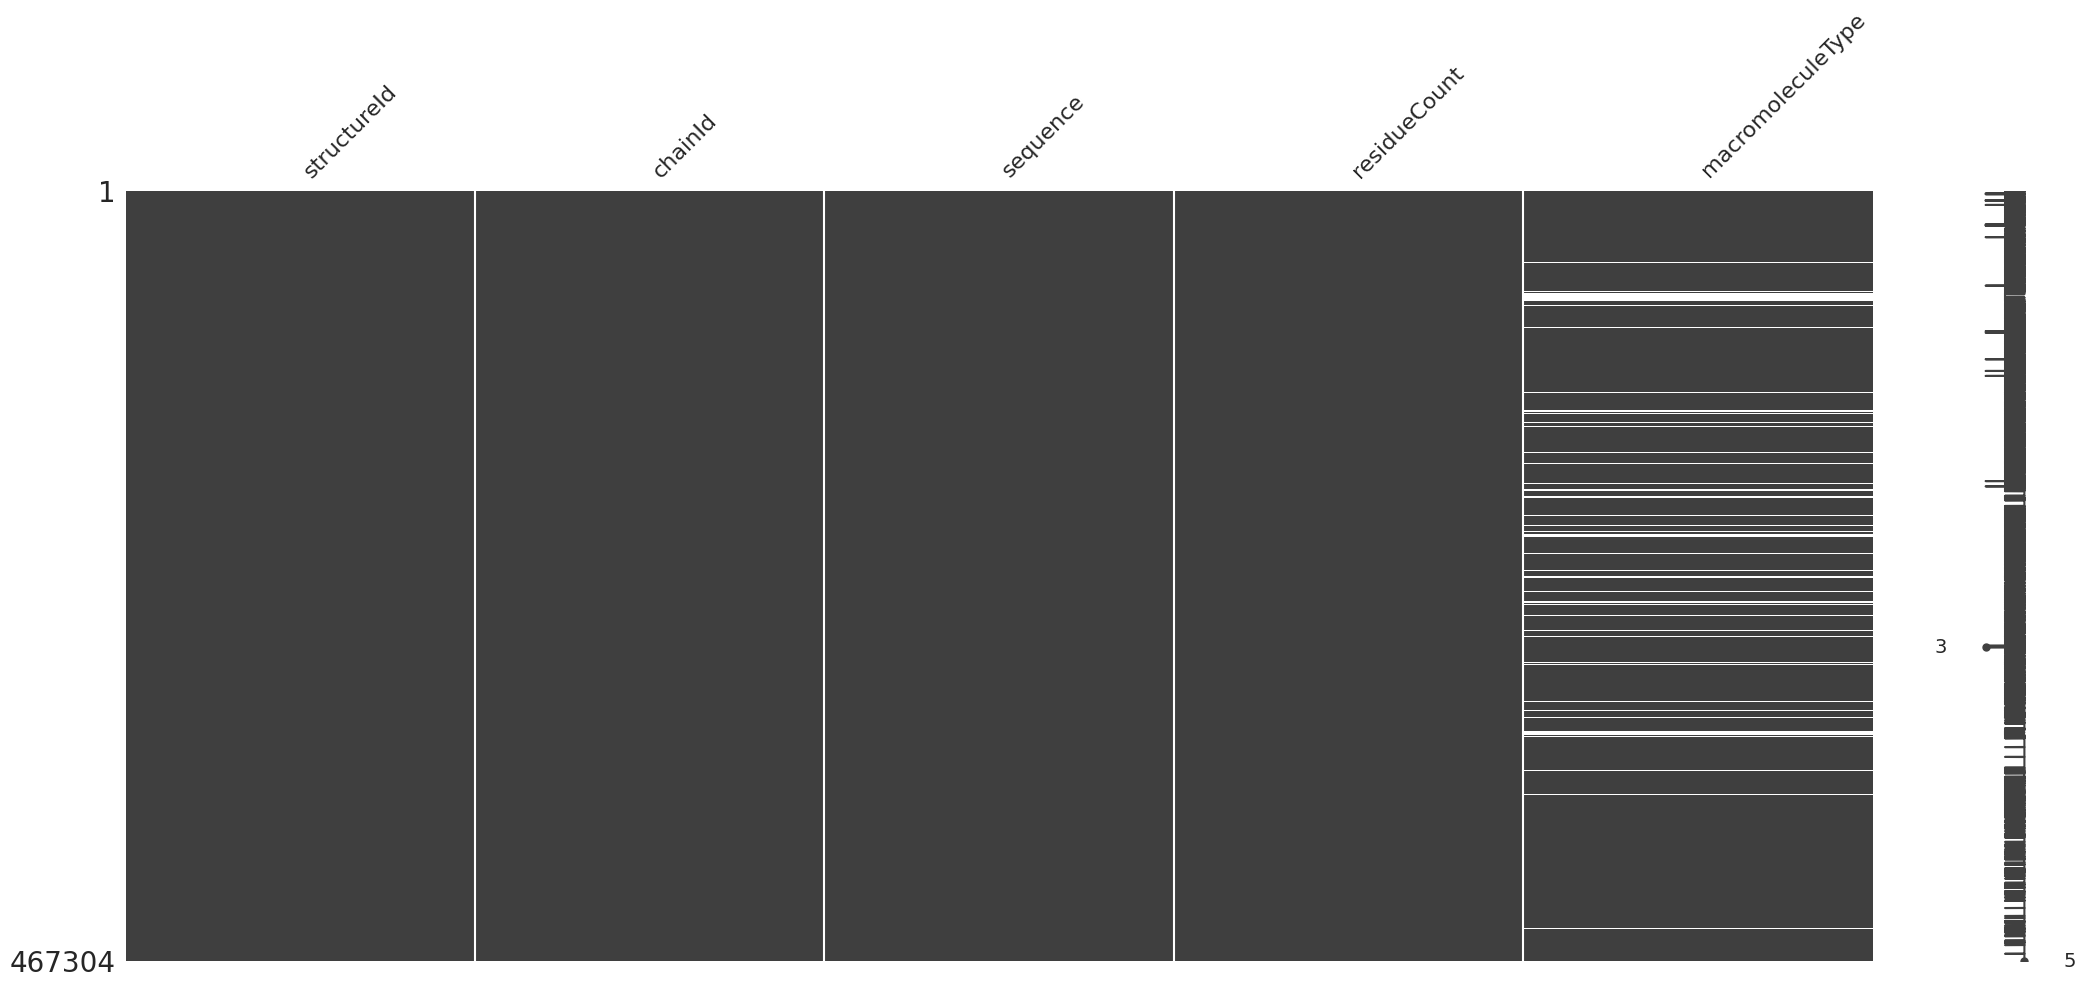

In [ ]:
msno.matrix(sequence)

### **Merging the 2 dataframes**

In [ ]:
# Merge the two Data set together
df = structure.merge(sequence,how='inner',on='structureId')
df.rename({'macromoleculeType_x':'macromoleculeType',
                                            'residueCount_y':'residueCount'},axis=1,inplace=True)
df.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)

The resulting dataframe 'df' is a merged version of the 'structure' and 'sequence' datasets, with the desired columns and without the unwanted columns. It combines information about the macromolecule type, residue count, and other attributes from both datasets into a single dataframe for further analysis or processing.

Removing duplicate rows from the dataframe df based on the values in the 'structureId' column.

In [ ]:
df.drop_duplicates(subset='structureId', inplace=True)

In [ ]:
df.isna().sum()

structureId                     0
classification                  2
experimentalTechnique           0
macromoleculeType            3064
resolution                  12504
structureMolecularWeight        0
crystallizationMethod       44531
crystallizationTempK        43738
densityMatthews             16298
densityPercentSol           16272
pdbxDetails                 22341
phValue                     35728
publicationYear             23518
chainId                         0
sequence                       28
residueCount                    0
dtype: int64

Looking at all the columns in the dataframe

In [ ]:
df.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'resolution', 'structureMolecularWeight',
       'crystallizationMethod', 'crystallizationTempK', 'densityMatthews',
       'densityPercentSol', 'pdbxDetails', 'phValue', 'publicationYear',
       'chainId', 'sequence', 'residueCount'],
      dtype='object')

## **Target column**
Let's look at the number of classes in our target column.

In [ ]:
# Analyze the distribution of 'classification'
print(df['classification'].value_counts())

HYDROLASE                                 20834
TRANSFERASE                               15702
OXIDOREDUCTASE                            12417
LYASE                                      4303
IMMUNE SYSTEM                              4065
                                          ...  
AMINE/CARBOXYLATE LIGASE                      1
STRUCTURAL PROTEIN,DNA BINDING PROTEIN        1
Ligase, Signaling Protein                     1
Cytokine Regulator                            1
antimicrobial                                 1
Name: classification, Length: 4989, dtype: int64


The target column has over 4900 datapoints and alot of these classes have only 1 datapoints. To make our ML model more efficient it will be wise to cut down the classes

### lets look at the top 10 protein families with the highest count

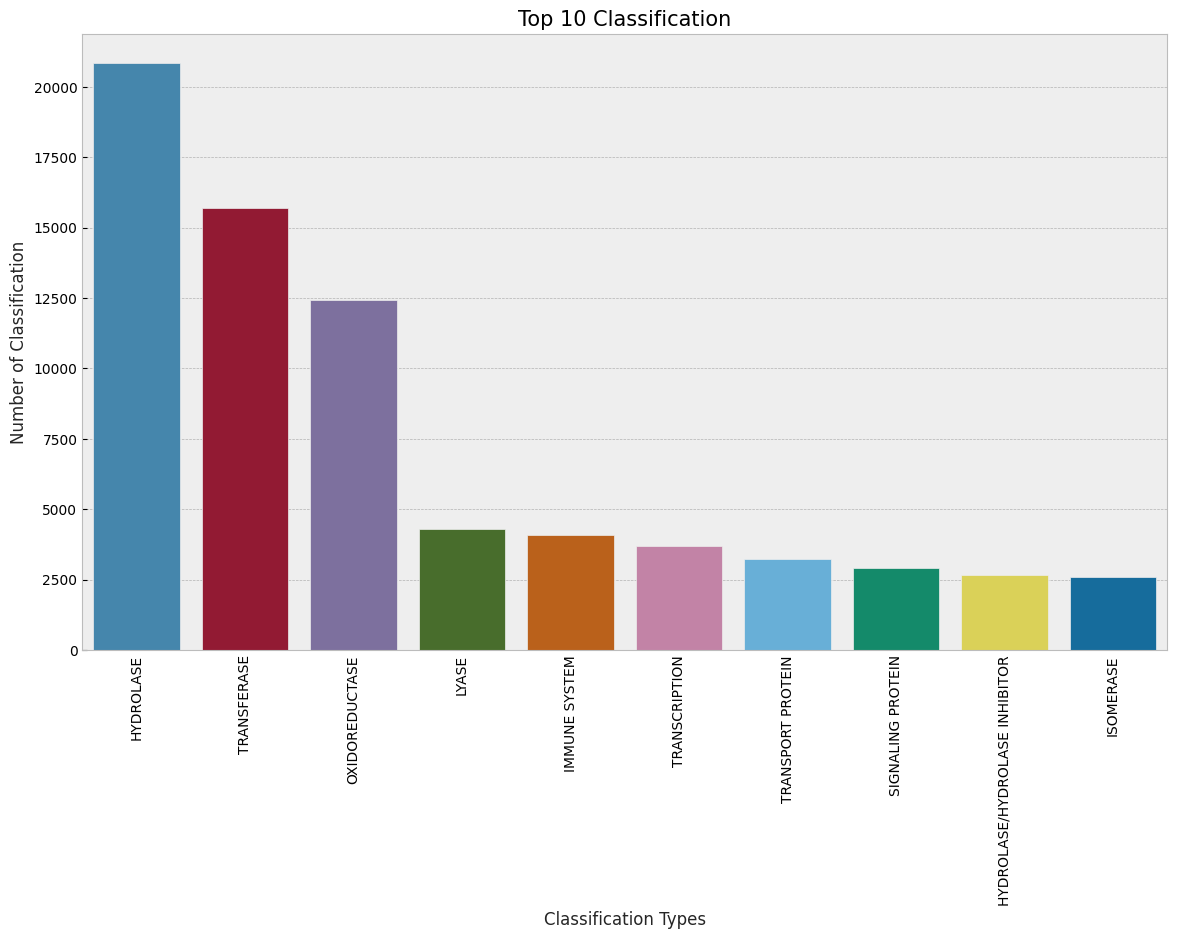

In [ ]:
classification = df.classification.value_counts()[:10]
plt.figure(figsize=(14,8))
plt.style.use("bmh")
sns.barplot(x=classification.index, y=classification.values)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Classification')
plt.xlabel('Classification Types')
plt.tick_params(colors='black')
plt.title('Top 10 Classification',fontsize=15, color='black')
plt.show();

It can be observed that only Hydrolase, Transferasee and Oxireductase have over 5000 proteins in their family.

### The next 20 classes

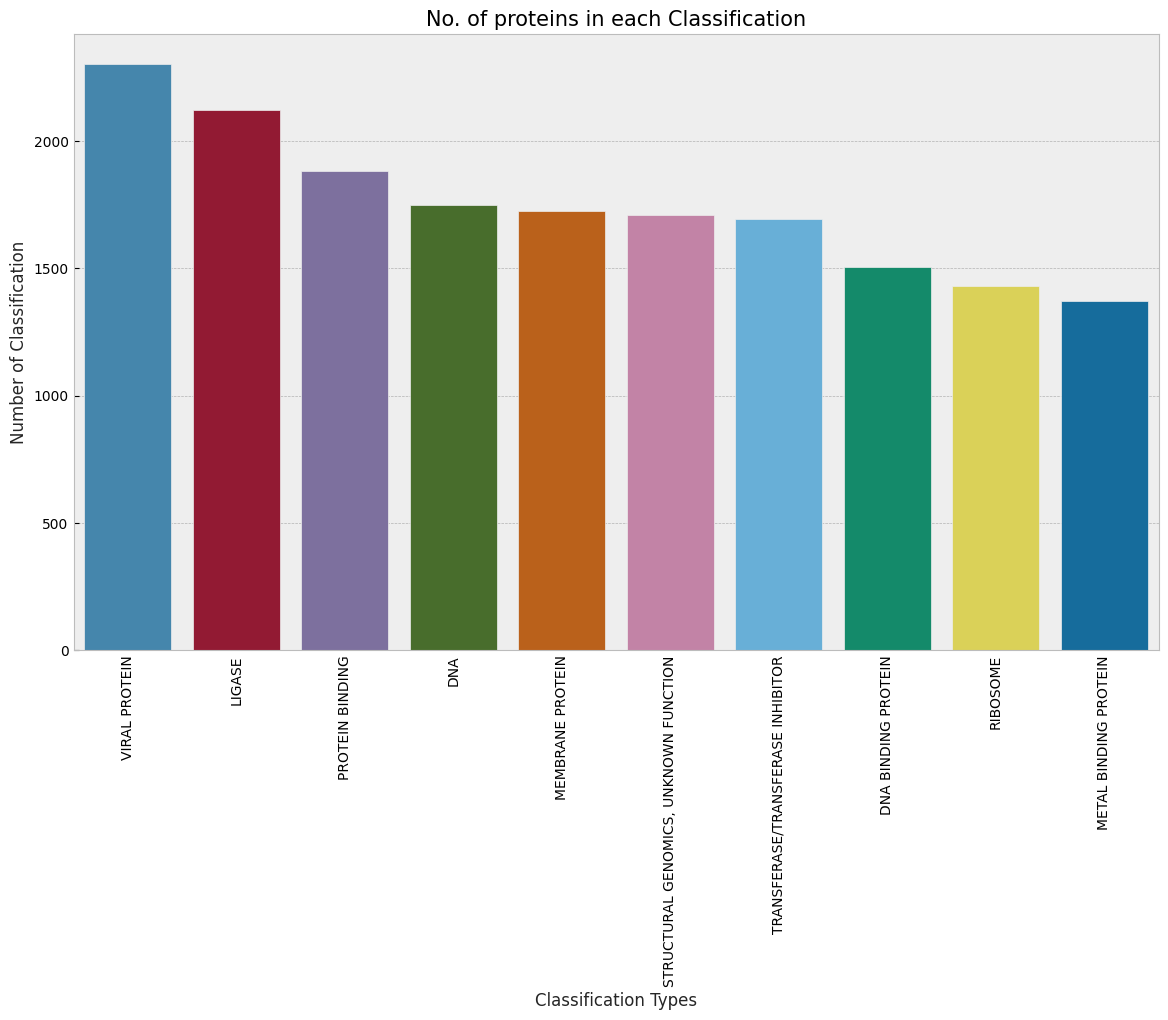

In [ ]:
classification = df.classification.value_counts()[10: 20]
plt.figure(figsize=(14,8))
plt.style.use("bmh")
sns.barplot(x=classification.index, y=classification.values)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Classification')
plt.xlabel('Classification Types')
plt.tick_params(colors='black')
plt.title('No. of proteins in each Classification',fontsize=15, color='black')
plt.show();

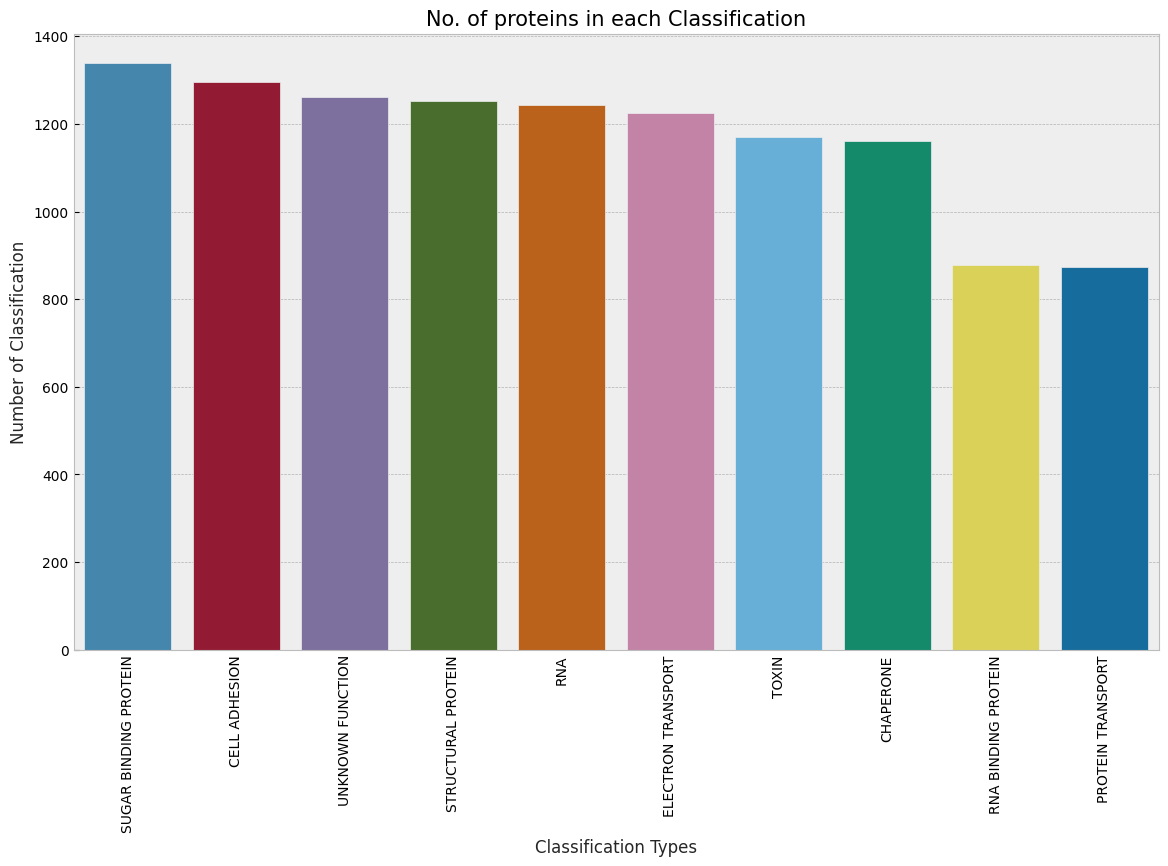

In [ ]:
classification = df.classification.value_counts()[20: 30]
plt.figure(figsize=(14,8))
plt.style.use("bmh")
sns.barplot(x=classification.index, y=classification.values)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Classification')
plt.xlabel('Classification Types')
plt.tick_params(colors='black')
plt.title('No. of proteins in each Classification',fontsize=15, color = 'black')
plt.show();

## Which are the most commonly employed techniques used to characterize protein 3D structure?

In [ ]:
# Analyze the distribution of 'experimentalTechnique'
df['experimentalTechnique'].value_counts()

X-RAY DIFFRACTION                                            125379
SOLUTION NMR                                                  12177
ELECTRON MICROSCOPY                                            2251
SOLID-STATE NMR                                                  99
ELECTRON CRYSTALLOGRAPHY                                         74
NEUTRON DIFFRACTION                                              60
FIBER DIFFRACTION                                                40
NEUTRON DIFFRACTION, X-RAY DIFFRACTION                           36
SOLUTION SCATTERING                                              32
X-RAY DIFFRACTION, NEUTRON DIFFRACTION                           30
POWDER DIFFRACTION                                               19
SOLUTION SCATTERING, SOLUTION NMR                                 9
SOLUTION NMR, SOLUTION SCATTERING                                 6
SOLID-STATE NMR, ELECTRON MICROSCOPY                              5
X-RAY DIFFRACTION, EPR                          

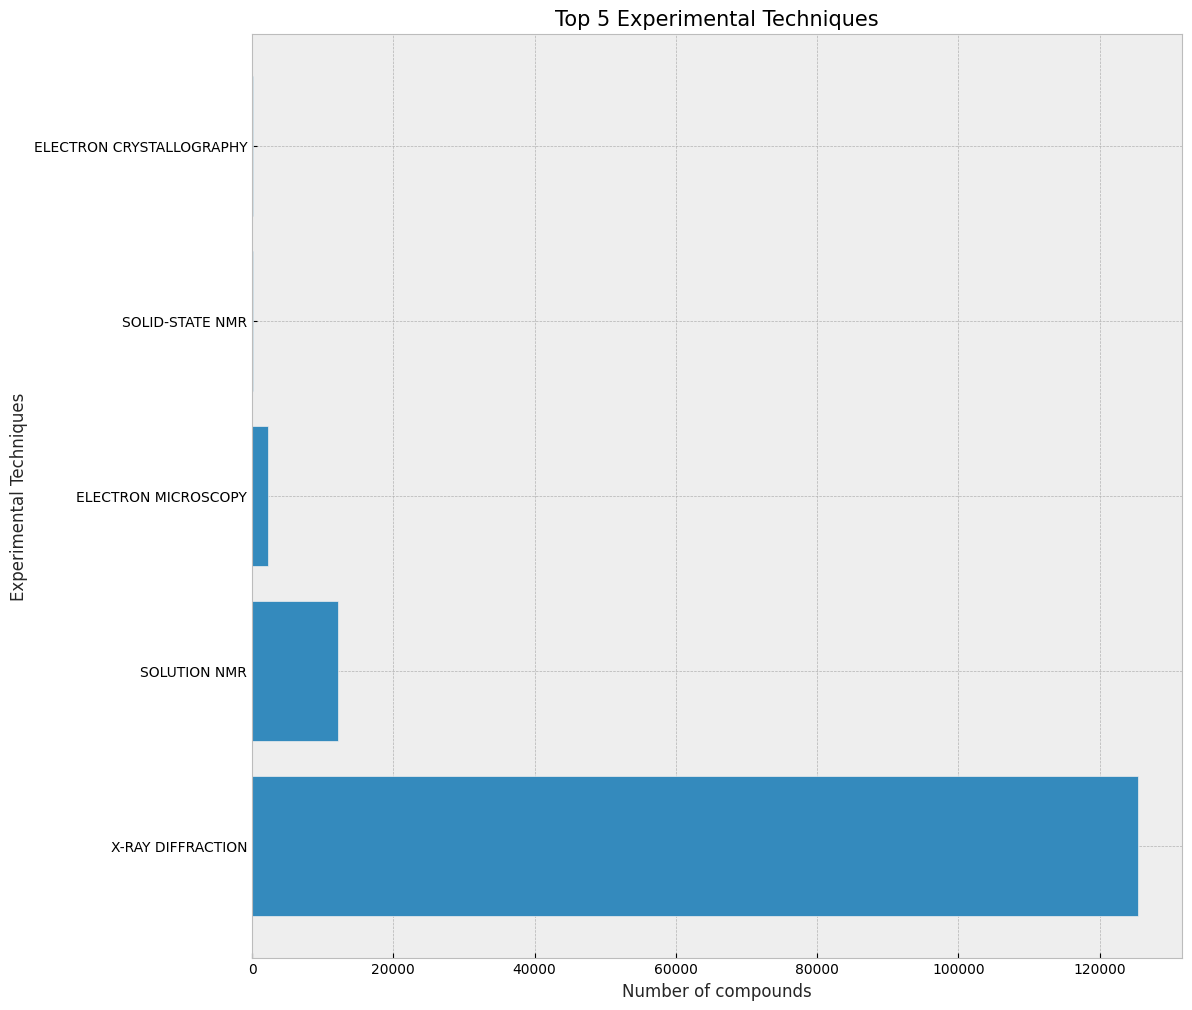

In [ ]:
Technique = df['experimentalTechnique'].value_counts()[:5]

plt.figure(figsize=(12, 12))
plt.style.use("bmh")
plt.tick_params(colors='black')
plt.barh(Technique.index, Technique.values)
plt.xlabel('Number of compounds')
plt.ylabel('Experimental Techniques')

plt.title('Top 5 Experimental Techniques', fontsize=15, color = 'black')
plt.show()

X-ray Diffraction is the most popular technique used and by a great margin.

## What are the types of Macromolecules?

<Figure size 2000x1800 with 0 Axes>

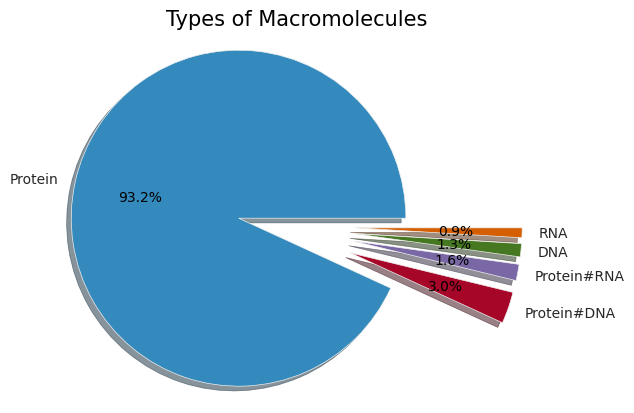

In [ ]:
plt.figure(figsize=(20,18))
ex = df.macromoleculeType.value_counts(ascending=False)[:5]
figureObject, axesObject = plt.subplots()
explode = (0.2, 0.5, 0.5, 0.5, 0.5)
plt.title("Types of Macromolecules",fontsize=15, color ='black')
plt.style.use("bmh")
plt.tick_params(colors='black')

# Create the pie chart
_, _, text = plt.pie(ex.values,
                     labels=ex.index,
                     shadow=True,
                     explode=explode,
                     autopct='%.1f%%')
for t in text:
    t.set_color('black')

axesObject.axis('equal')

plt.show()

Proteins, RNA, DNA, RNA proteins and DNA proteins are the type of macromolecules that are present in our dataframe.

## pH value of Proteins

Below function takes a pH value as input and returns a corresponding label indicating whether the pH is acidic, basic (alkaline), or neutral

In [ ]:
def ph_value(ph):
    if ph < 7 :       ##If the pH value is less than 7, it is considered acidic,
                             ## label 'Acidic' is assigned to the variable ph.
          ph = 'Acidic'
    elif ph > 7:          ## If the pH value is greater than 7, it is considered basic
          ph = 'Base'
    else:                   ##If the pH value is exactly 7, it is considered neutral, and the label 'Neutral' is assigned to the variable ph.
          ph = 'Neutral'
    return ph

In [ ]:
#filtering out rows with missing pH values, assigning pH categories to the remaining data,
#and then calculates the count of occurrences for each pH category.
df_ph = df.dropna(subset=["phValue"])
df_ph['pH'] = df_ph['phValue'].apply(ph_value)
labels = df_ph['pH'].value_counts().index
values = df_ph['pH'].value_counts().values

creating a pie chart

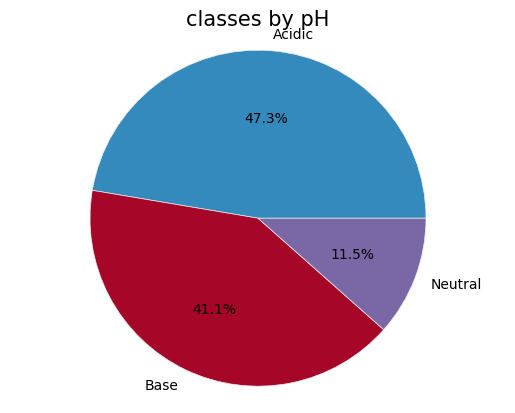

In [ ]:
fig1, ax1 = plt.subplots()
# Create the pie chart with black values
_, _, autotexts = ax1.pie(values, labels=labels, autopct='%1.1f%%', textprops={'color': 'black'})

# Set equal aspect ratio to make the pie circular
ax1.axis('equal')

# Apply darkgrid style
plt.style.use("bmh")

# Set the title with black color
plt.title("classes by pH", fontsize=15, color='black')

# Set the color of the percentage values to black
for autotext in autotexts:
    autotext.set_color('black')

# Display the pie chart
plt.show()


## Looking at the missing values in the dataset again

In [ ]:
df_isnull = pd.DataFrame(round((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100,1)).reset_index()
df_isnull.columns = ['Columns', '% of Missing Data']
df_isnull.style.format({'% of Missing Data': lambda x:'{:.1%}'.format(abs(x))})
cm = sns.light_palette("purple", as_cmap=True)
df_isnull = df_isnull.style.background_gradient(cmap=cm)
df_isnull

## Which are the top 10 crystallisation methods used for preparing protein samples for 3D structure analysis?

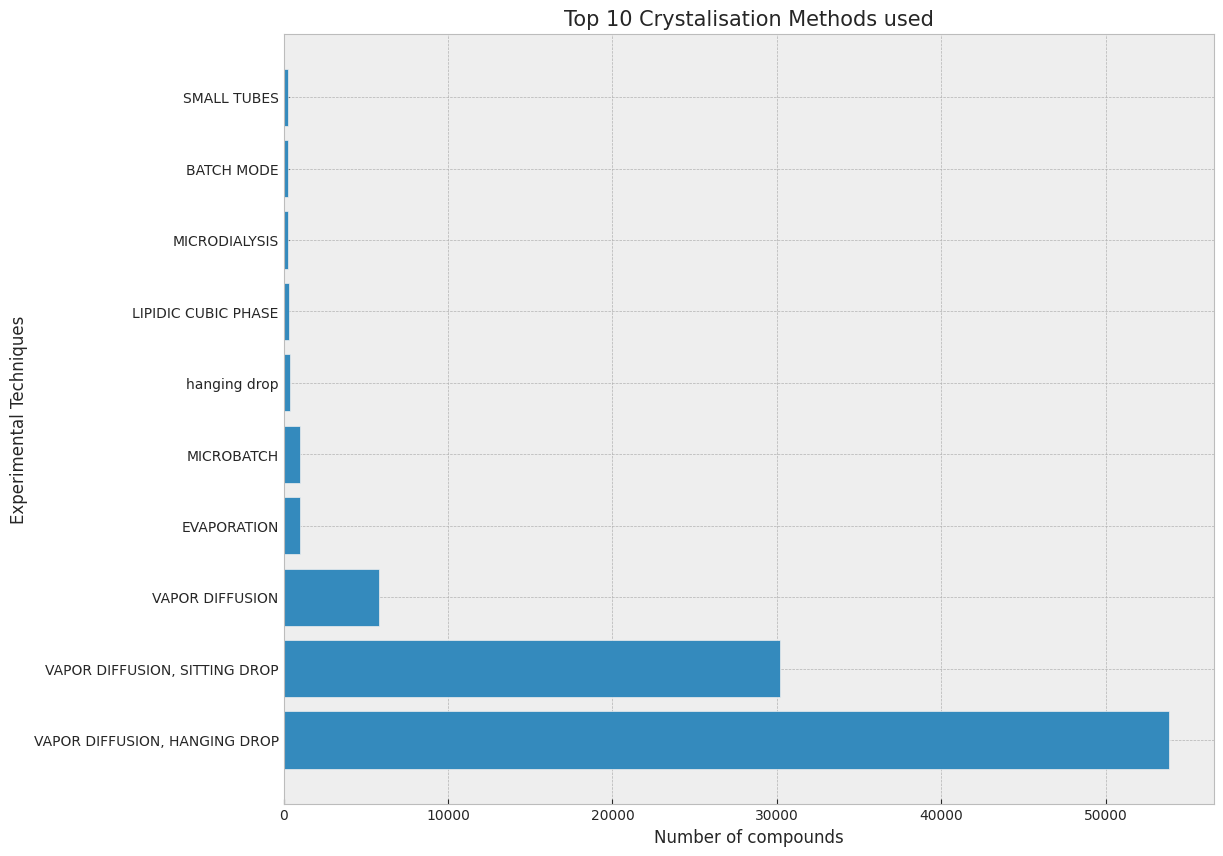

In [ ]:
crystallization_Method = structure['crystallizationMethod'].value_counts()[:10]

plt.figure(figsize=(12, 10))
plt.style.use("bmh")
plt.barh(crystallization_Method .index, crystallization_Method .values)
plt.xlabel('Number of compounds')
plt.ylabel('Experimental Techniques')
plt.title('Top 10 Crystalisation Methods used', fontsize=15)
plt.show()

1. Hanging drop: In this method, a droplet containing the protein sample is suspended upside down on a cover slide over a reservoir solution, allowing for crystal growth
2. Vapor diffusion: This method involves the diffusion of vapor from a reservoir solution to a drop containing the protein sample, resulting in the formation of protein crystals.

There are obvious repetations in the dataset

# 4. **Reducing the Dataset**




As we have seen, the dataset has over 4900 protein family classes as Target Column. It is best to reduce the number of classes.
Strategy used - reduce the dataset only to the classes with over 1500 proteins.

In [ ]:
from collections import Counter
class_num = Counter(df.classification)

over_1500 = Counter({k:class_num for k, class_num in class_num.items() if class_num >= 1500})
print('Class with over 1500 counts:')
for classes, count in over_1500.most_common():
  print ('%s: %7d' % (classes, count))

Class with over 1500 counts:
HYDROLASE:   20834
TRANSFERASE:   15702
OXIDOREDUCTASE:   12417
LYASE:    4303
IMMUNE SYSTEM:    4065
TRANSCRIPTION:    3677
TRANSPORT PROTEIN:    3237
SIGNALING PROTEIN:    2893
HYDROLASE/HYDROLASE INHIBITOR:    2672
ISOMERASE:    2588
VIRAL PROTEIN:    2305
LIGASE:    2123
PROTEIN BINDING:    1881
DNA:    1750
MEMBRANE PROTEIN:    1727
STRUCTURAL GENOMICS, UNKNOWN FUNCTION:    1710
TRANSFERASE/TRANSFERASE INHIBITOR:    1695
DNA BINDING PROTEIN:    1507


1. Hydrolase: This family consists of enzymes that catalyze the hydrolysis of various bonds, such as ester, peptide, and glycosidic bonds. They play a crucial role in breaking down complex molecules into simpler forms during metabolic processes.

2. Transferase: Transferases are enzymes involved in transferring functional groups, such as amino groups, methyl groups, and phosphate groups, from one molecule to another. They participate in important cellular processes, including biosynthesis, energy metabolism, and signal transduction.

3. Oxidoreductase: This family includes enzymes that catalyze oxidation-reduction reactions by transferring electrons from one molecule to another. They are involved in diverse biological processes, such as energy production, detoxification, and biosynthesis.

4. Lyase: Lyases are enzymes that catalyze the addition or removal of groups to or from a molecule, resulting in the formation of double bonds or the cleavage of existing bonds. They participate in various metabolic pathways and contribute to the synthesis and degradation of molecules.

5. Immune System: Proteins related to the immune system play critical roles in defending the body against pathogens, foreign substances, and abnormal cells. They include components of the immune response, such as antibodies, cytokines, and complement proteins.

6. Transcription: Proteins involved in transcription are responsible for regulating the synthesis of RNA from DNA. They include transcription factors, RNA polymerases, and coactivators or corepressors that control gene expression.

7. Transport Protein: Transport proteins facilitate the movement of molecules across biological membranes. They can transport ions, nutrients, hormones, and other molecules, playing a crucial role in cellular homeostasis and signaling.

8. Signaling Protein: Signaling proteins are involved in transmitting signals within cells or between cells. They participate in cell communication pathways, including those related to growth, development, metabolism, and response to environmental stimuli.

9. Hydrolase/Hydrolase Inhibitor: This category encompasses both hydrolases and their inhibitors. Hydrolases catalyze the hydrolysis of various bonds, while hydrolase inhibitors regulate their activity by binding and inhibiting their function.

10. Isomerase: Isomerases catalyze the rearrangement of atoms within a molecule, converting it into its isomeric form. They contribute to metabolic pathways, such as carbohydrate metabolism and amino acid metabolism.

11. Viral Protein: Viral proteins are produced by viruses and are essential for viral replication, assembly, and infection of host cells. They can modulate host immune responses and manipulate cellular processes to support viral survival.

12. Ligase: Ligases catalyze the joining of two molecules, often using ATP as an energy source. They are involved in DNA repair, DNA replication, and the synthesis of complex molecules, such as proteins and RNA.

13. Protein Binding: Proteins in this family have the ability to bind to other molecules, including proteins, nucleic acids, or small molecules. They play crucial roles in protein-protein interactions, DNA binding, enzyme-substrate interactions, and signal transduction.

14. DNA: DNA-binding proteins have specific binding affinity for DNA molecules and participate in processes such as DNA replication, repair, recombination, and transcriptional regulation.

15. Membrane Protein: Membrane proteins are embedded or associated with cell membranes and perform diverse functions, including transport of molecules across membranes, signal transduction, and cell adhesion.

16. Structural Genomics, Unknown Function: Proteins in this category have been identified through structural genomics projects but their specific functions are yet to be determined or are currently unknown.

17. Transferase/Transferase Inhibitor: This family includes proteins that have dual functionality as both transferases and transferase inhibitors. Transferases are enzymes that transfer functional groups from one molecule to another, while transferase inhibitors regulate the activity of transferases by binding to them and inhibiting their function. Proteins in this family play a role in various biological processes, including metabolism, signal transduction, and cellular regulation.

18. DNA Binding Protein: DNA binding proteins are proteins that have the ability to specifically bind to DNA molecules. They interact with DNA sequences to regulate gene expression, DNA replication, DNA repair, and other DNA-related processes. DNA binding proteins play a critical role in controlling the structure and function of the genome, and they are involved in various cellular processes, including transcriptional regulation, chromatin remodeling, and DNA packaging. These proteins can recognize specific DNA sequences or have a more general affinity for DNA. Their binding to DNA is essential for the proper functioning of many biological processes and is crucial for the maintenance of cellular integrity and homeostasis.


In [ ]:
select = np.array([[x[0], x[1]]for x in over_1500.most_common()[:18]])
[classes, counts ] = select[:,0], select[:,1].astype(int)
df= df[[x in classes for x in df.classification]]

In [ ]:
df.reset_index()

index structureId                 classification  \
0           2        101D                            DNA   
1           5        102D                            DNA   
2           9        103D                            DNA   
3          18        105D                            DNA   
4          23        106D                            DNA   
...       ...         ...                            ...   
87081  471040        9HVP  HYDROLASE/HYDROLASE INHIBITOR   
87082  471115        9ILB              SIGNALING PROTEIN   
87083  471118        9JDW                    TRANSFERASE   
87084  471123        9LPR  HYDROLASE/HYDROLASE INHIBITOR   
87085  471130        9NSE                 OXIDOREDUCTASE   

      experimentalTechnique macromoleculeType  resolution  \
0         X-RAY DIFFRACTION               DNA        2.25   
1         X-RAY DIFFRACTION               DNA        2.20   
2              SOLUTION NMR               DNA         NaN   
3              SOLUTION NMR               DNA         NaN   
4              SOLUTION NMR               DNA         NaN   
...                     ...               ...         ...   
87081     X-RAY DIFFRACTION           Protein        2.80   
87082     X-RAY DIFFRACTION           Protein        2.28   
87083     X-RAY DIFFRACTION           Protein        2.50   
87084     X-RAY DIFFRACTION           Protein        2.20   
87085     X-RAY DIFFRACTION           Protein        2.24   

       structureMolecularWeight          crystallizationMethod  \
0                       7939.35                            NaN   
1                       7637.17  VAPOR DIFFUSION, SITTING DROP   
2                       7502.93                            NaN   
3                       3350.40                            NaN   
4                       3086.58                            NaN   
...                         ...                            ...   
87081                  22398.46                            NaN   
87082                  17395.83                            NaN   
87083                  44444.61                            NaN   
87084                  20455.54                            NaN   
87085                 102350.65                            NaN   

       crystallizationTempK  densityMatthews  densityPercentSol  \
0                       NaN             2.00              38.45   
1                     277.0             2.28              46.06   
2                       NaN              NaN                NaN   
3                       NaN              NaN                NaN   
4                       NaN              NaN                NaN   
...                     ...              ...                ...   
87081                   NaN             2.23              44.86   
87082                   NaN             3.36              60.00   
87083                   NaN             3.83              68.00   
87084                   NaN             2.50              50.88   
87085                   NaN             2.41              50.00   

                                             pdbxDetails  phValue  \
0                                                    NaN      NaN   
1      pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...      7.0   
2                                                    NaN      NaN   
3                                                    NaN      NaN   
4                                                    NaN      NaN   
...                                                  ...      ...   
87081                                                NaN      NaN   
87082                                             pH 8.5      8.5   
87083                                             pH 7.0      7.0   
87084                                                NaN      NaN   
87085                                             pH 6.5      6.5   

       publicationYear chainId  \
0               1995.0       A   
1               1995.0       A   
2               1994.0   

In [ ]:
df['classification'].value_counts()

HYDROLASE                                20834
TRANSFERASE                              15702
OXIDOREDUCTASE                           12417
LYASE                                     4303
IMMUNE SYSTEM                             4065
TRANSCRIPTION                             3677
TRANSPORT PROTEIN                         3237
SIGNALING PROTEIN                         2893
HYDROLASE/HYDROLASE INHIBITOR             2672
ISOMERASE                                 2588
VIRAL PROTEIN                             2305
LIGASE                                    2123
PROTEIN BINDING                           1881
DNA                                       1750
MEMBRANE PROTEIN                          1727
STRUCTURAL GENOMICS, UNKNOWN FUNCTION     1710
TRANSFERASE/TRANSFERASE INHIBITOR         1695
DNA BINDING PROTEIN                       1507
Name: classification, dtype: int64

## Let us deal with the missing values

In [ ]:
df.isna().sum()

structureId                     0
classification                  0
experimentalTechnique           0
macromoleculeType            1426
resolution                   5262
structureMolecularWeight        0
crystallizationMethod       23328
crystallizationTempK        22645
densityMatthews              6512
densityPercentSol            6497
pdbxDetails                  9202
phValue                     18182
publicationYear             16622
chainId                         0
sequence                        2
residueCount                    0
dtype: int64

i used median value to fill the missing values

In [ ]:
median_value = df['densityMatthews'].median()
# Fill missing values with the mean
df['densityMatthews'].fillna(median_value, inplace=True)

In [ ]:
median_value = df['phValue'].median()
# Fill missing values with the mean
df['phValue'].fillna(median_value, inplace=True)

In [ ]:
median_value = df['densityPercentSol'].median()
# Fill missing values with the mean
df['densityPercentSol'].fillna(median_value, inplace=True)

dropping any other missing values

In [ ]:
df.dropna()
df.reset_index()

index structureId                 classification  \
0           2        101D                            DNA   
1           5        102D                            DNA   
2           9        103D                            DNA   
3          18        105D                            DNA   
4          23        106D                            DNA   
...       ...         ...                            ...   
87081  471040        9HVP  HYDROLASE/HYDROLASE INHIBITOR   
87082  471115        9ILB              SIGNALING PROTEIN   
87083  471118        9JDW                    TRANSFERASE   
87084  471123        9LPR  HYDROLASE/HYDROLASE INHIBITOR   
87085  471130        9NSE                 OXIDOREDUCTASE   

      experimentalTechnique macromoleculeType  resolution  \
0         X-RAY DIFFRACTION               DNA        2.25   
1         X-RAY DIFFRACTION               DNA        2.20   
2              SOLUTION NMR               DNA         NaN   
3              SOLUTION NMR               DNA         NaN   
4              SOLUTION NMR               DNA         NaN   
...                     ...               ...         ...   
87081     X-RAY DIFFRACTION           Protein        2.80   
87082     X-RAY DIFFRACTION           Protein        2.28   
87083     X-RAY DIFFRACTION           Protein        2.50   
87084     X-RAY DIFFRACTION           Protein        2.20   
87085     X-RAY DIFFRACTION           Protein        2.24   

       structureMolecularWeight          crystallizationMethod  \
0                       7939.35                            NaN   
1                       7637.17  VAPOR DIFFUSION, SITTING DROP   
2                       7502.93                            NaN   
3                       3350.40                            NaN   
4                       3086.58                            NaN   
...                         ...                            ...   
87081                  22398.46                            NaN   
87082                  17395.83                            NaN   
87083                  44444.61                            NaN   
87084                  20455.54                            NaN   
87085                 102350.65                            NaN   

       crystallizationTempK  densityMatthews  densityPercentSol  \
0                       NaN             2.00              38.45   
1                     277.0             2.28              46.06   
2                       NaN             2.48              50.15   
3                       NaN             2.48              50.15   
4                       NaN             2.48              50.15   
...                     ...              ...                ...   
87081                   NaN             2.23              44.86   
87082                   NaN             3.36              60.00   
87083                   NaN             3.83              68.00   
87084                   NaN             2.50              50.88   
87085                   NaN             2.41              50.00   

                                             pdbxDetails  phValue  \
0                                                    NaN      7.0   
1      pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...      7.0   
2                                                    NaN      7.0   
3                                                    NaN      7.0   
4                                                    NaN      7.0   
...                                                  ...      ...   
87081                                                NaN      7.0   
87082                                             pH 8.5      8.5   
87083                                             pH 7.0      7.0   
87084                                                NaN      7.0   
87085                                             pH 6.5      6.5   

       publicationYear chainId  \
0               1995.0       A   
1               1995.0       A   
2               1994.0   

## Addressing skewness and kurtosis

Skewness and kurtosis are statistical measures that provide insights into the shape and distribution of a dataset.

**Skewness:**
Skewness measures the asymmetry of a distribution. It determines whether the data is skewed to the left or right relative to the mean. A skewness value of 0 indicates a perfectly symmetrical distribution, where the data is evenly distributed around the mean. Positive skewness (skewness > 0) indicates that the distribution has a longer tail on the right side, suggesting that the data is skewed to the right. Negative skewness (skewness < 0) indicates that the distribution has a longer tail on the left side, suggesting that the data is skewed to the left. Skewness is a useful measure for understanding the shape of the distribution and identifying potential outliers or departures from normality.

**Kurtosis:**
Kurtosis measures the "tailedness" or the degree of peakedness of a distribution. It quantifies the shape of the distribution's tails relative to the normal distribution. A kurtosis value of 0 indicates a normal distribution, where the tails have the same shape as the normal distribution. Positive kurtosis (kurtosis > 0) indicates that the distribution has heavier tails and a sharper peak than the normal distribution, indicating a leptokurtic distribution. Negative kurtosis (kurtosis < 0) indicates that the distribution has lighter tails and a flatter peak than the normal distribution, indicating a platykurtic distribution. High kurtosis values indicate more extreme outliers or a distribution with more extreme values compared to the normal distribution. Kurtosis is useful for understanding the presence of outliers and deviations from the normal distribution.

In summary, skewness measures the asymmetry of a distribution, while kurtosis measures the "tailedness" or the degree of peakedness. Both measures provide insights into the shape and characteristics of a dataset.

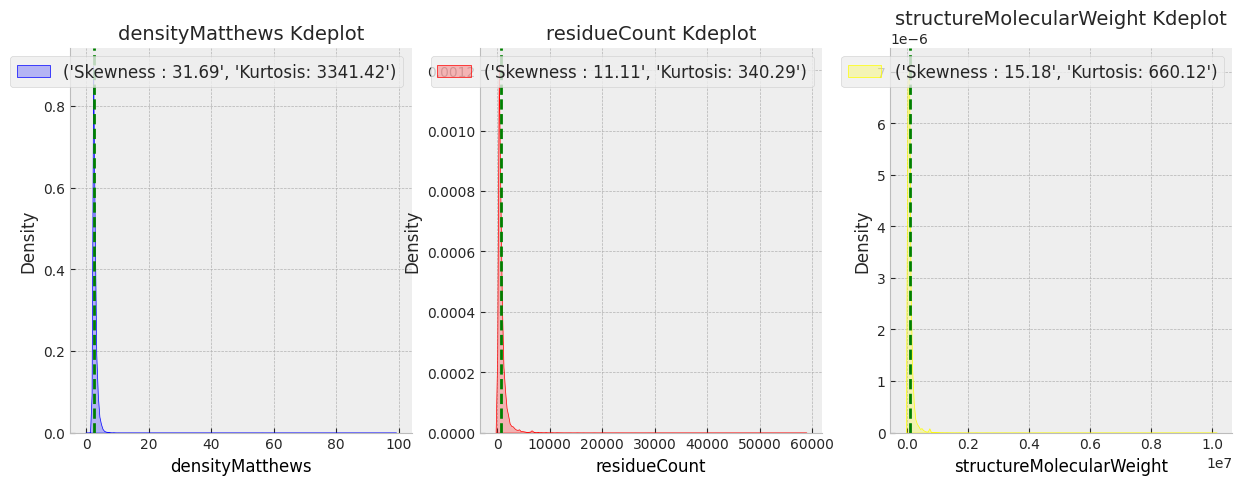

In [ ]:
from scipy import stats
from scipy.stats import norm, skew, kurtosis
def stat_kde_plot(input1,input2,input3):
    f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
    sns.kdeplot(df[input1],ax = ax1,color ='blue',shade=True,
                label=("Skewness : %.2f"%(df[input1].skew()),
                       "Kurtosis: %.2f"%(df[input1].kurtosis())))
    sns.kdeplot(df[input2], ax = ax2,color='r',shade=True,
                label=("Skewness : %.2f"%(df[input2].skew()),
                       "Kurtosis: %.2f"%(df[input2].kurtosis())))
    sns.kdeplot(df[input3], ax = ax3,color='yellow',shade=True,
                label=("Skewness : %.2f"%(df[input3].skew()),
                       "Kurtosis: %.2f"%(df[input3].kurtosis())))
    axes = [ax1,ax2,ax3]
    input = [input1,input2,input3]
    for j in range(len(axes)):
        axes[j].set_xlabel(input[j],color='black',fontsize=12)
        axes[j].set_title(input[j] + ' Kdeplot',fontsize=14)
        axes[j].axvline(df[input[j]].mean() , color ='g',linestyle = '--')
        axes[j].legend(loc ='upper right',fontsize=12,ncol=2)
    sns.despine()
    return plt.show()

stat_kde_plot('densityMatthews','residueCount','structureMolecularWeight')

**DENSITY MATTHEWS:**
A skewness value of 31.69 indicates a highly skewed distribution. Since the skewness is positive, it suggests that the distribution has a longer tail on the right side and is skewed to the right. This means that there are some extremely large values or outliers in the positive direction that are pulling the distribution towards the right.

A kurtosis value of 3341.42 indicates a very high degree of kurtosis. With such a high value, the distribution has extremely heavy tails and a very sharp peak compared to the normal distribution. This suggests the presence of extreme outliers or the occurrence of very rare events in the data. The distribution is highly leptokurtic, meaning it has more extreme values and heavier tails compared to the normal distribution.

**RESIDUE COUNT**
A skewness value of 11.11 indicates a moderately skewed distribution. Since the skewness is positive, it suggests that the distribution has a longer tail on the right side and is skewed to the right. This means that there are some larger values or outliers in the positive direction that are pulling the distribution towards the right.

A kurtosis value of 340.29 indicates a high degree of kurtosis. With such a high value, the distribution has heavy tails and a relatively sharp peak compared to the normal distribution. This suggests the presence of outliers or the occurrence of rare events in the data. The distribution is leptokurtic, meaning it has more extreme values and heavier tails compared to the normal distribution.

**STRUCTURAL MOLECULAR WEIGHT**

A skewness value of 15.18 indicates a highly skewed distribution. Since the skewness is positive, it suggests that the distribution has a longer tail on the right side and is skewed to the right. This means that there are significant outliers or extremely large values in the positive direction that are pulling the distribution towards the right.

A kurtosis value of 660.12 indicates a very high degree of kurtosis. With such a high value, the distribution has extremely heavy tails and a very sharp peak compared to the normal distribution. This suggests the presence of outliers or the occurrence of very rare events in the data. The distribution is highly leptokurtic, meaning it has many extreme values and very heavy tails compared to the normal distribution.

To address this issue,  we define a loop that iterates over the three variables, namely 'densityMatthews', 'residueCount', and 'structureMolecularWeight'. Within the loop, each variable is transformed using a lambda function. If the value of the variable is greater than zero, it is converted to its natural logarithm using the np.log() function. If the value is zero or negative, it is set to zero. This transformation is applied to handle cases where the original values may have a wide range or include zero or negative values.

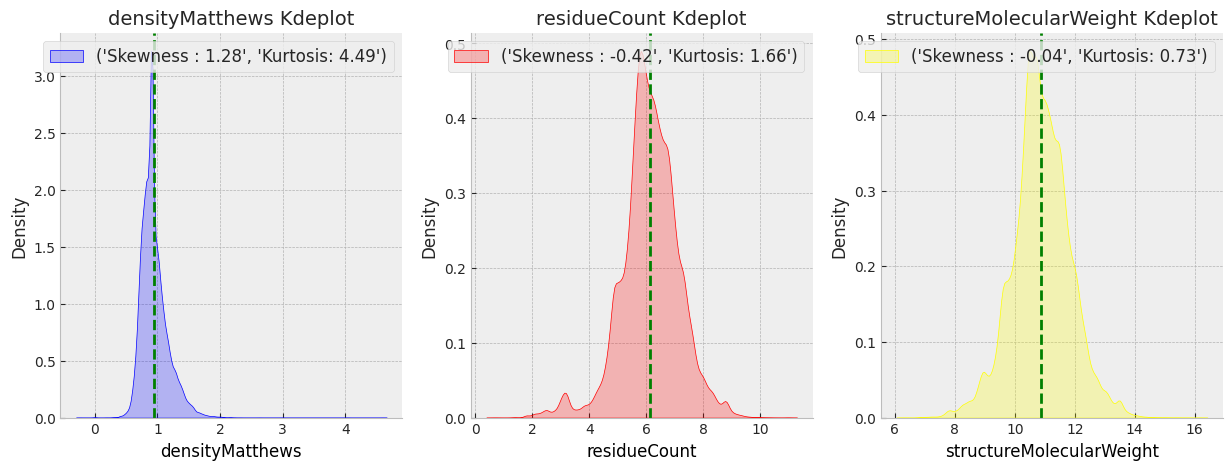

In [ ]:
for i in ['densityMatthews','residueCount','structureMolecularWeight']:
    df[i] = df[i].map(lambda i: np.log(i) if i > 0 else 0)
stat_kde_plot('densityMatthews','residueCount','structureMolecularWeight')

The data is now less skewed.

Dropping columns that don't are not related to determining a Protein family.

The columns 'experimentalTechnique', 'resolution', 'crystallizationMethod', 'crystallizationTempK', 'densityPercentSol', 'pdbxDetails', 'publicationYear', and 'chainId' may not be necessary in finding the protein family because they provide information about the experimental techniques used, crystallization details, and specific attributes of the protein structure that are not directly related to determining the protein family.

In [ ]:
df.drop(['experimentalTechnique', 'resolution', 'crystallizationMethod', 'crystallizationTempK', 'densityPercentSol', 'pdbxDetails', 'publicationYear', 'chainId'], axis=1, inplace=True)

In [ ]:
df.reset_index()

index structureId                 classification macromoleculeType  \
0           2        101D                            DNA               DNA   
1           5        102D                            DNA               DNA   
2           9        103D                            DNA               DNA   
3          18        105D                            DNA               DNA   
4          23        106D                            DNA               DNA   
...       ...         ...                            ...               ...   
87081  471040        9HVP  HYDROLASE/HYDROLASE INHIBITOR           Protein   
87082  471115        9ILB              SIGNALING PROTEIN           Protein   
87083  471118        9JDW                    TRANSFERASE           Protein   
87084  471123        9LPR  HYDROLASE/HYDROLASE INHIBITOR           Protein   
87085  471130        9NSE                 OXIDOREDUCTASE           Protein   

       structureMolecularWeight  densityMatthews  phValue  \
0                      8.979587         0.693147      7.0   
1                      8.940782         0.824175      7.0   
2                      8.923049         0.908259      7.0   
3                      8.116835         0.908259      7.0   
4                      8.034819         0.908259      7.0   
...                         ...              ...      ...   
87081                 10.016747         0.802002      7.0   
87082                  9.763986         1.211941      8.5   
87083                 10.701999         1.342865      7.0   
87084                  9.926009         0.916291      7.0   
87085                 11.536160         0.879627      6.5   

                                                sequence  residueCount  
0                                           CGCGAATTCGCG      3.178054  
1                                           CGCAAATTTGCG      3.178054  
2                                           GTGGAATGGAAC      3.178054  
3                                                    TCC      2.484907  
4                                                    CCT      2.484907  
...                                                  ...           ...  
87081  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...      5.288267  
87082  APVRSLNCTLRDSQQKSLVMSGPYELKALHLQGQDMEQQVVFSMSF...      5.030438  
87083  STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...      5.955837  
87084  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...      5.313206  
87085  SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...      6.788972  

[87086 rows x 9 columns]

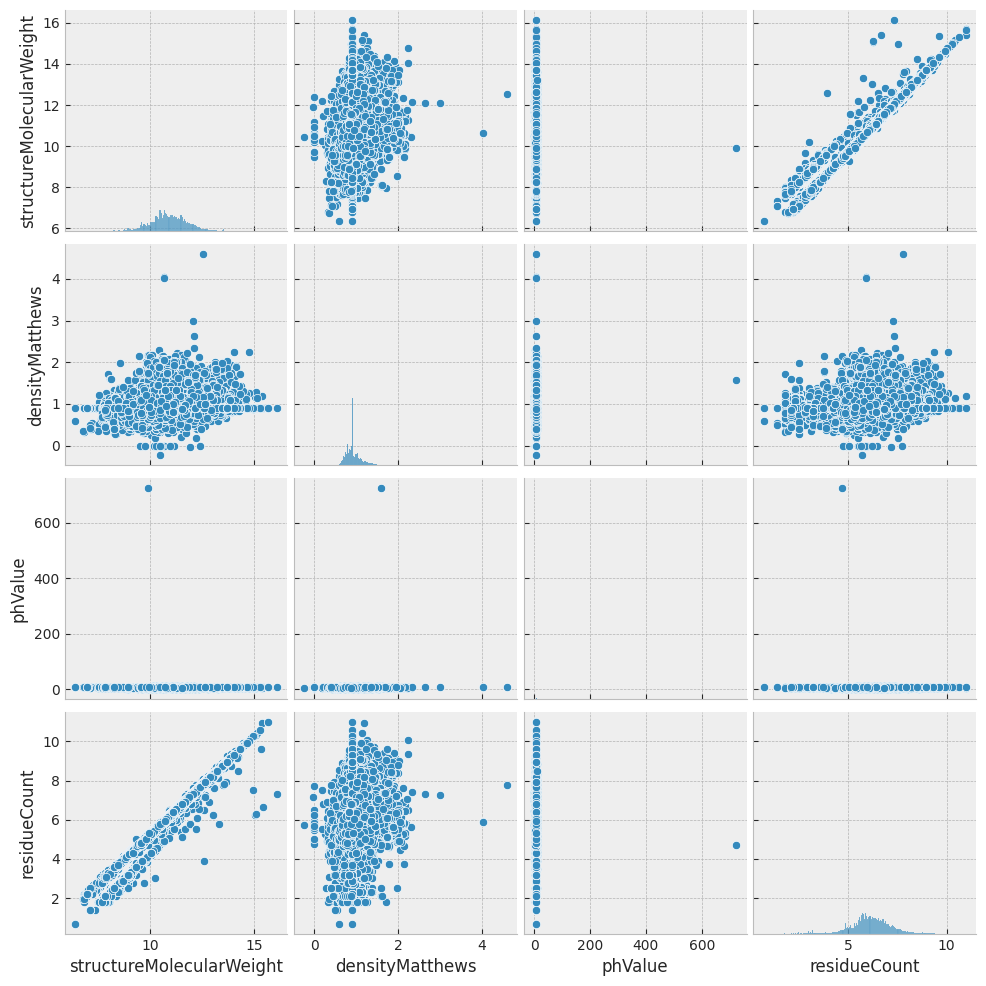

In [ ]:
sns.pairplot(df)
sns.set(style="ticks", color_codes=True)

<Axes: >

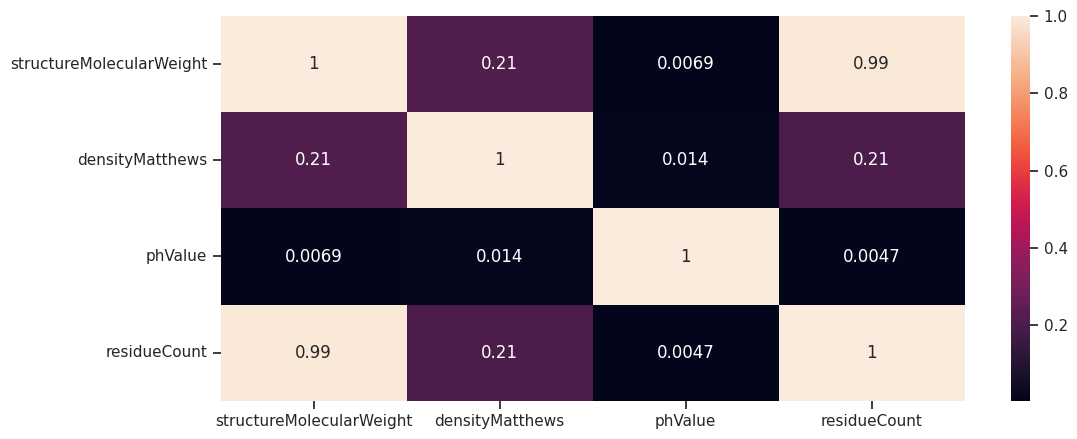

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, annot=True)

Structural Molecular weight of a protein and Residue count are highly correlated.
The high correlation between the structural molecular weight and residue count suggests that larger proteins with more amino acid residues tend to have higher molecular weights. This correlation is expected because as the protein sequence becomes longer and more complex, the total mass of the protein also increases.

## Residue counts and Protein Family classes

In [ ]:
def box_plot(input, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    g = sns.boxplot(x="classification", y=input, data=df)
    plt.title(input, fontsize=14, color='black')
    plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
    plt.show()

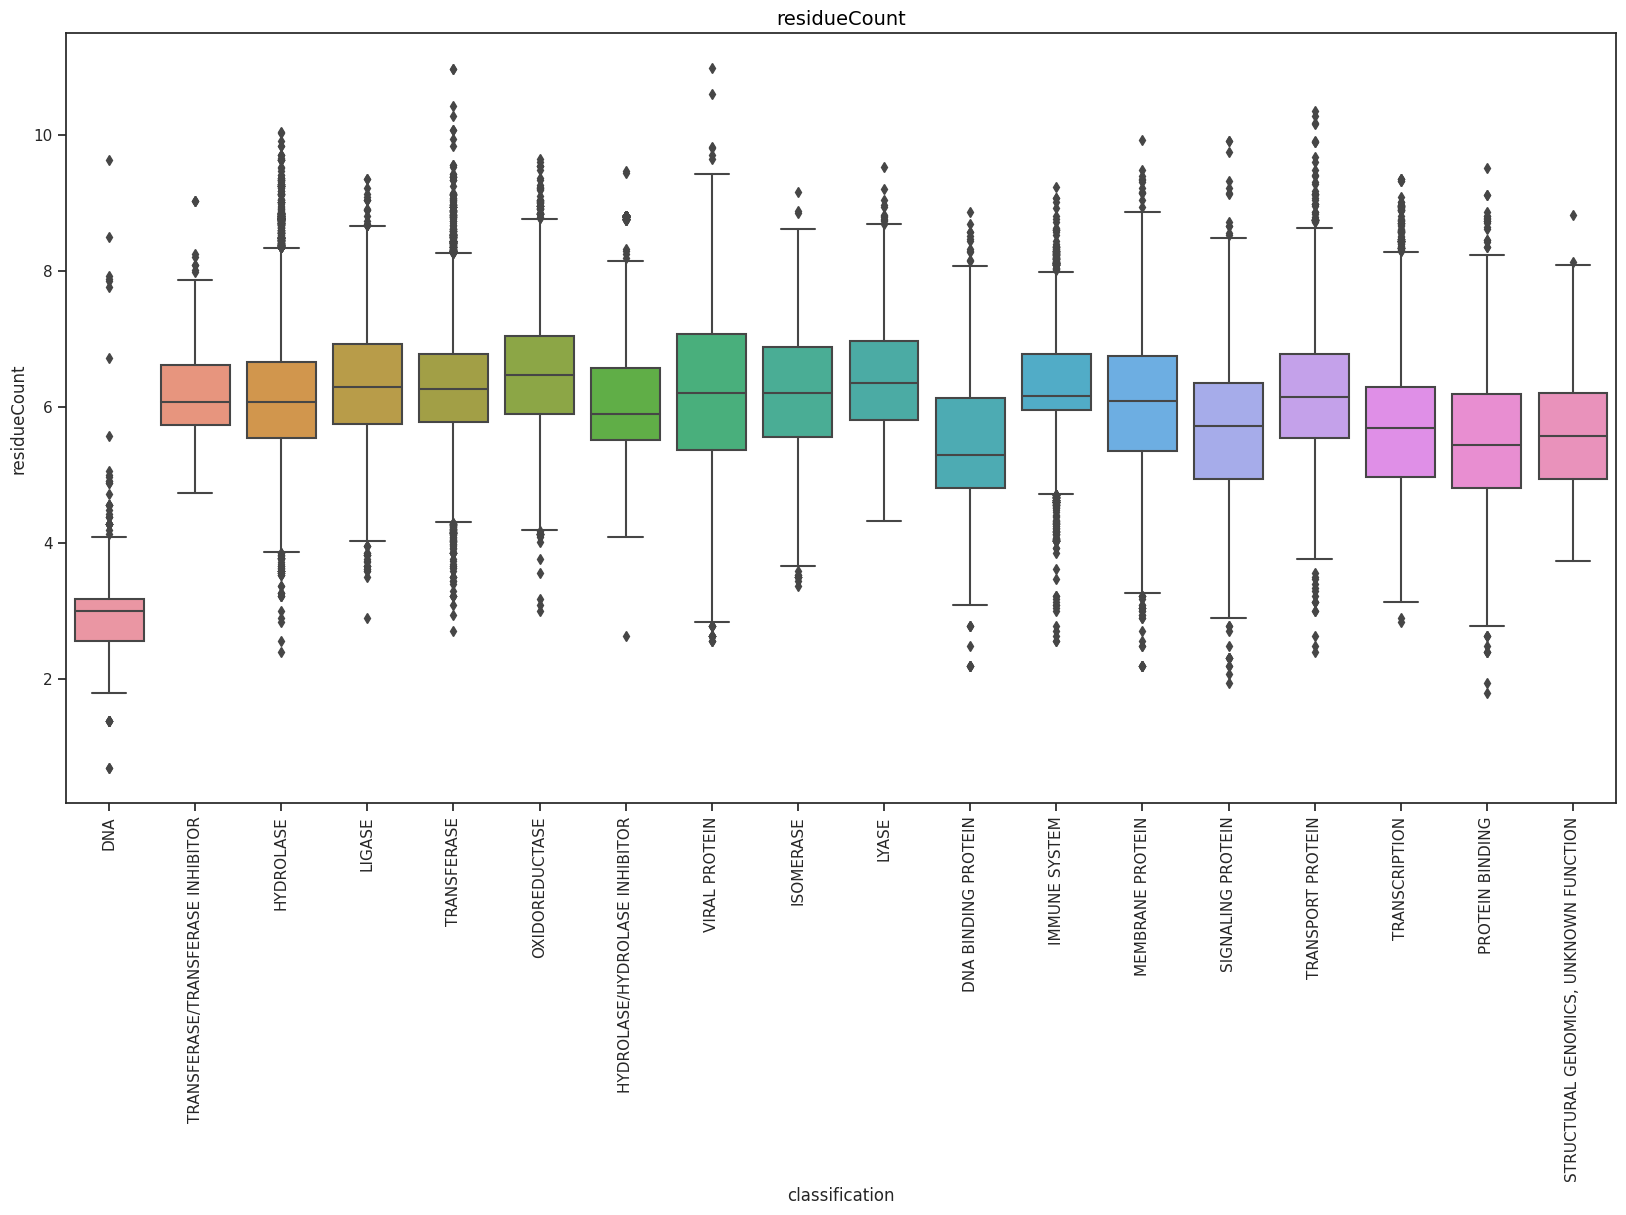

In [ ]:
box_plot('residueCount', figsize=(20, 10))

All proteins except DNA seem to have a similar residue count with many outliers.

DNA is a molecule that carries the genetic instructions for the development, functioning, growth, and reproduction of all living organisms. It is composed of a sequence of nucleotides, which are the building blocks of DNA. Each nucleotide consists of a sugar molecule (deoxyribose), a phosphate group, and one of four nitrogenous bases (adenine, thymine, cytosine, and guanine).

The residue count in DNA refers to the number of nucleotides in the DNA sequence. Unlike proteins, which are composed of long chains of amino acids, DNA sequences are typically shorter and consist of a specific sequence of nucleotides.

The relatively low residue count of DNA is due to the nature of its structure and function. DNA serves as the genetic material and provides the instructions for the synthesis of proteins, which are responsible for carrying out various biological processes. While proteins can be large and complex, DNA sequences are usually shorter and more focused on encoding specific genetic information.



## Structural Molecular Weight VS Proteins

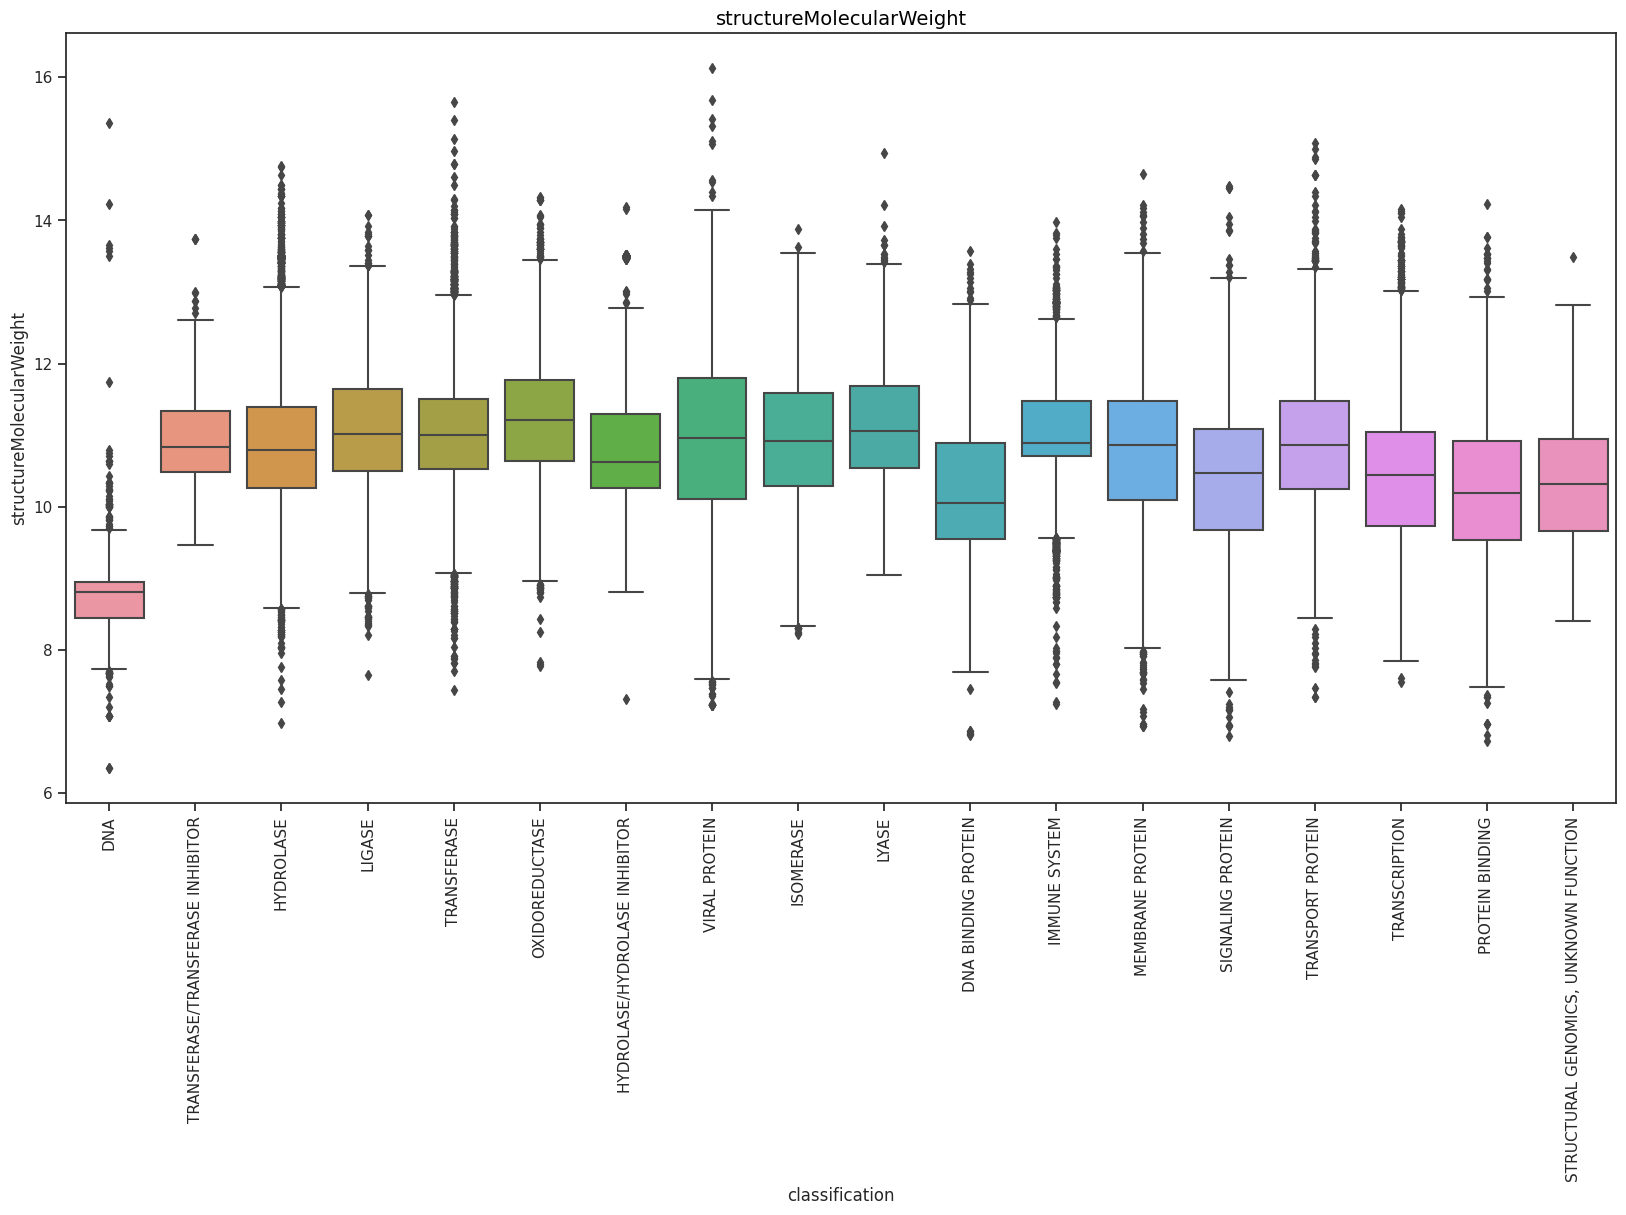

In [ ]:
box_plot('structureMolecularWeight', figsize=(20, 10))

<Figure size 2000x1500 with 0 Axes>

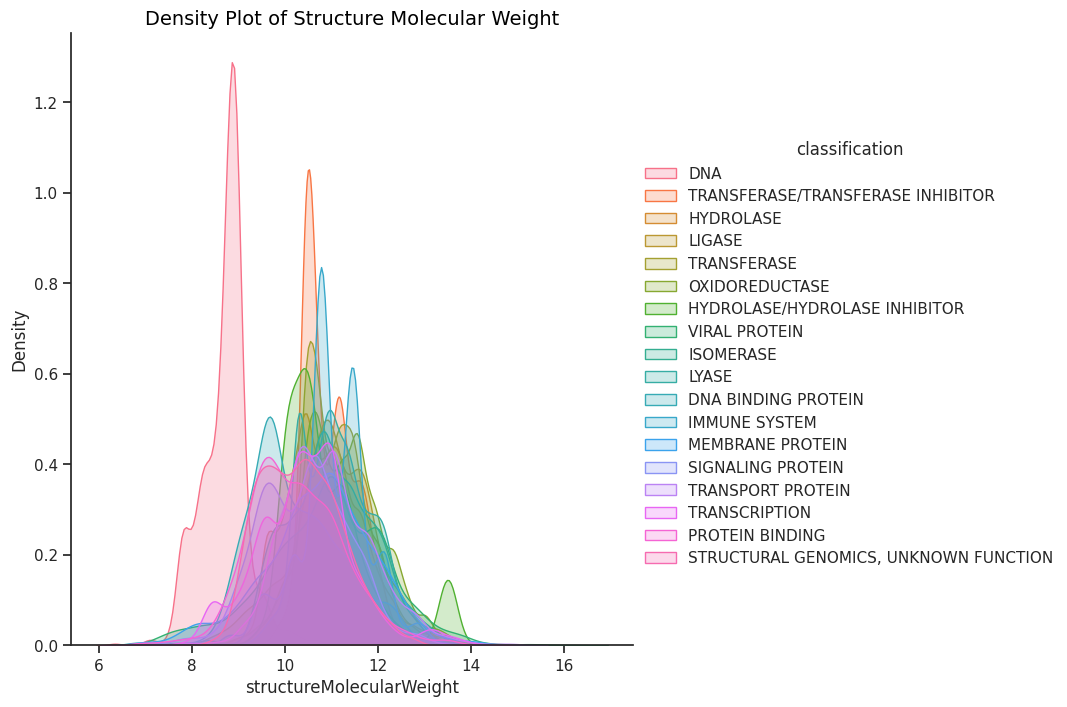

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
g = sns.FacetGrid(df, hue="classification", height = 7)
g.map(sns.kdeplot, "structureMolecularWeight", shade=True)
g.add_legend()
plt.title("Density Plot of Structure Molecular Weight", fontsize=14, color='black')
plt.show();


As we had seen that residue count and Structural molecular weight are highly correlated, it was certain that DNA would have a lower Structural MW compared to other protein families.
Since DNA is composed of a sequence of nucleotides rather than amino acids like proteins, it has a relatively lower residue count and, consequently, a lower structural molecular weight compared to protein families.

## Density Matthews VS Proteins

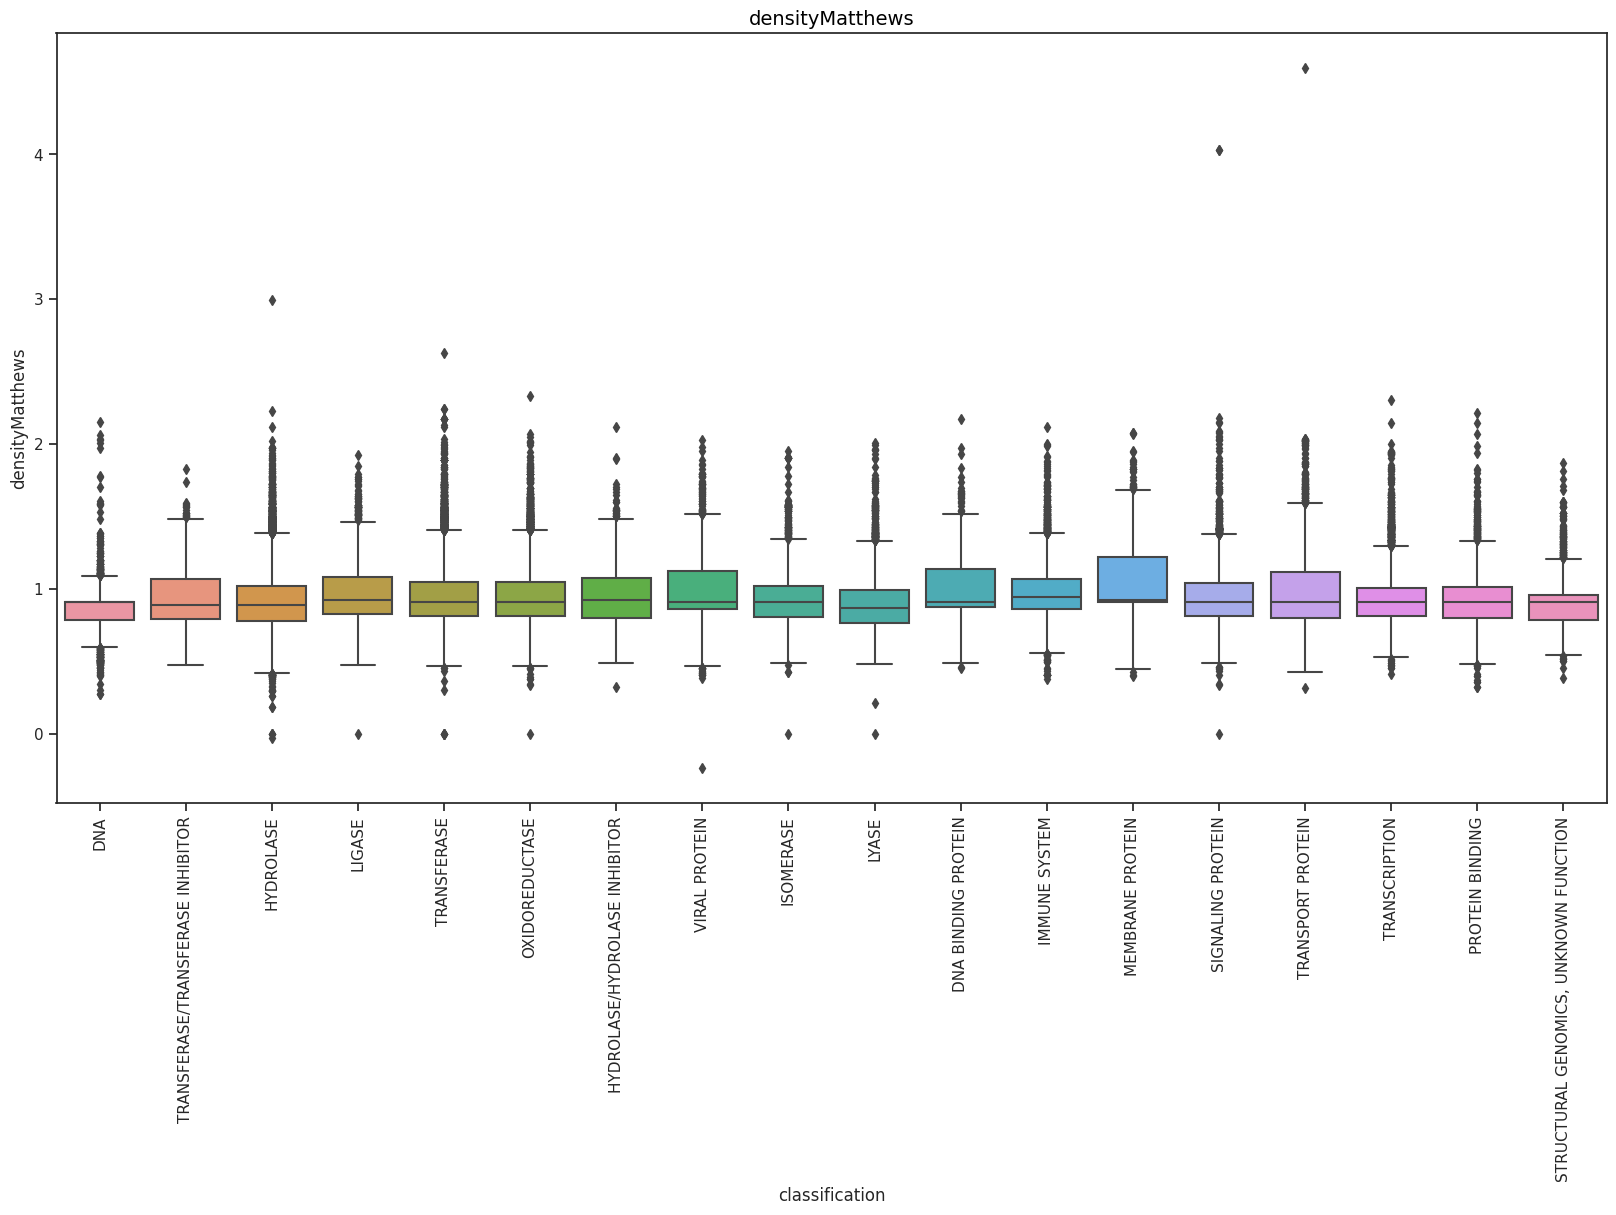

In [ ]:
box_plot('densityMatthews', figsize=(20, 10))

All protein families in our datasets seem to have the same Density Matthews

A higher DensityMatthews value suggests a higher packing density, indicating that the protein molecules are closely packed within the crystal lattice. On the other hand, a lower DensityMatthews value indicates a lower packing density, suggesting that there may be gaps or voids in the crystal lattice.

***DensityMatthews = Vm / Vs***

Where Vm represents the volume of the protein molecule and Vs represents the volume of the crystallographic asymmetric unit. The DensityMatthews value indicates how tightly the protein molecules are packed within the crystal lattice.

Researchers analyze the DensityMatthews values to evaluate the quality of protein crystals and to make informed decisions regarding data collection, refinement, and further structural analysis. It helps in characterizing the crystal packing environment and assessing the potential impact of packing forces on protein structure and function.

## Residue count vs Structural molecular weight by Protein Family

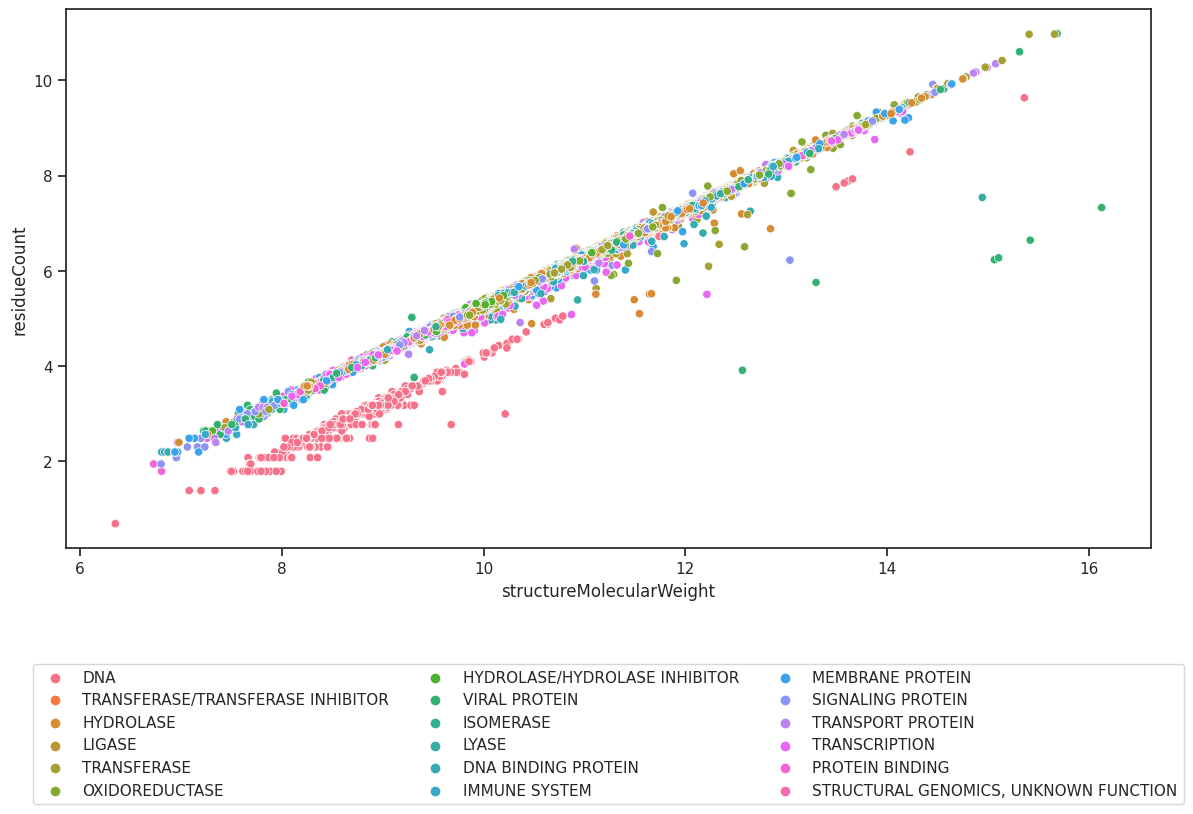

In [ ]:
plt.figure(figsize=(14, 7))
ax = sns.scatterplot(x="structureMolecularWeight", y="residueCount", hue="classification", data=df)

# Move the legend below the graph
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.show()


There seems to be a an obvious positive correlation between Residue count and Structural Molecular weight with DNA having a relatively lower correlation than other protein families.

## Residue count vs Structural molecular weight by Protein Family

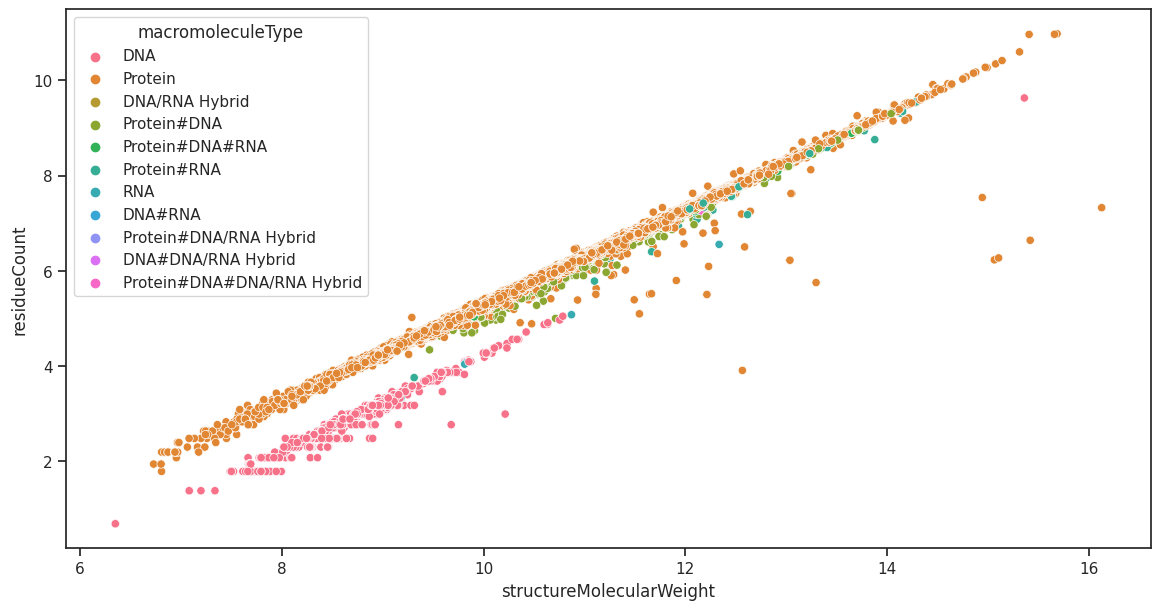

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.scatterplot(x = "structureMolecularWeight", y = "residueCount" ,hue="macromoleculeType",data= df)

We can see the same relation between protein residue count and structural molecular weight in this graph and DNA seems to have a lower correlation than the other Macromolecular types.

### Being sure of the null values again.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

structureId                 0
classification              0
macromoleculeType           0
structureMolecularWeight    0
densityMatthews             0
phValue                     0
sequence                    0
residueCount                0
dtype: int64

## Analysing the numerical columns

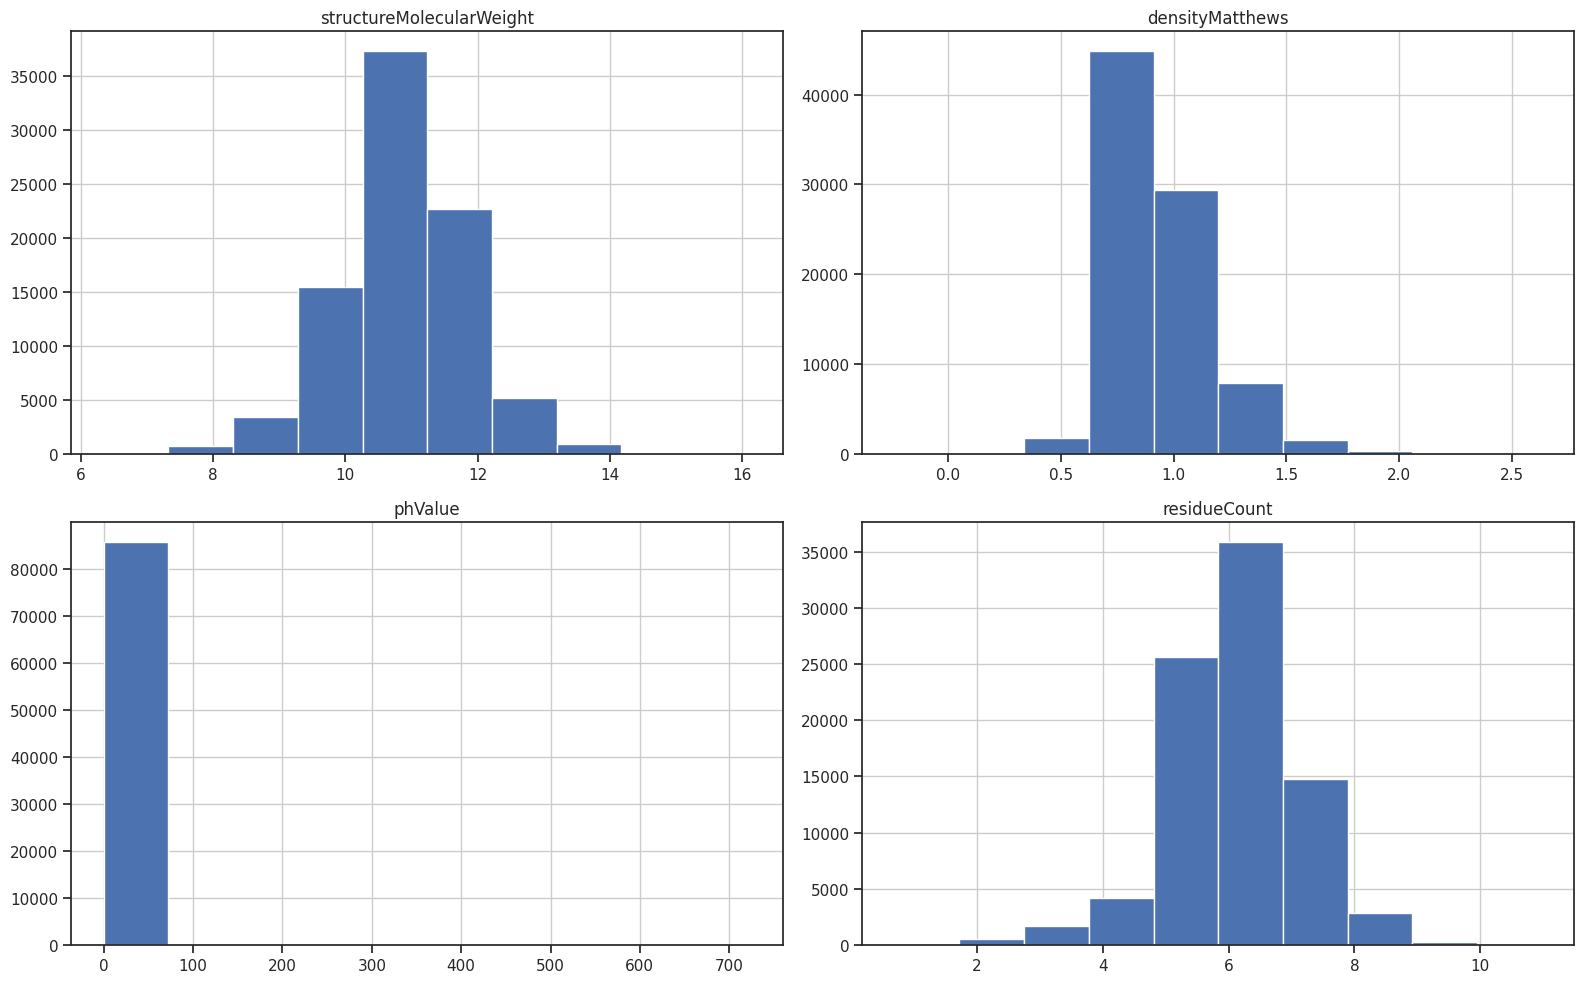

In [ ]:
df.hist(bins=10, figsize=(16, 10))
plt.tight_layout()

pH values of all protein obviously lie in the same range

In [ ]:
df.shape

(85658, 8)

# 5. **Feature Engineering using Biopython**

In [ ]:
def unique(list1):  ##getting a list of unique values only
    x = np.array(list1)
    return np.unique(x)

Biopython is a widely used open-source Python library specifically designed for computational biology and bioinformatics tasks. It provides various modules and submodules that offer functionalities for working with biological data, such as DNA, RNA, and protein sequences, molecular structures, sequence alignments, phylogenetic trees, and more.

In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.4 MB/s eta 0:00:00


In [ ]:
#Importing the necessary module
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#Iterating over each row in the dataframe:
for i, row in df.iterrows():
    analysed_seq = ProteinAnalysis(row['sequence'])   #Creating a ProteinAnalysis object for the protein sequence:
    try:                                              #Calculating and assigning various protein properties to the dataframe
        df.loc[i, 'instability_index'] = analysed_seq.instability_index()
        df.loc[i, 'Molecularweight'] = analysed_seq.molecular_weight()
        df.loc[i, 'aromaticity'] = analysed_seq.aromaticity()
        df.loc[i, 'isoelectric_point'] = analysed_seq.isoelectric_point()
        df.loc[i, 'Helix'] = analysed_seq.secondary_structure_fraction()[0]
        df.loc[i, 'Turn'] = analysed_seq.secondary_structure_fraction()[1]
        df.loc[i, 'Sheet'] = analysed_seq.secondary_structure_fraction()[2]
        df.loc[i, 'Amino_Acid_A_percentage'] = analysed_seq.get_amino_acids_percent()['A']
        df.loc[i, 'Amino_Acid_C_percentage'] = analysed_seq.get_amino_acids_percent()['C']
        df.loc[i, 'Amino_Acid_D_percentage'] = analysed_seq.get_amino_acids_percent()['D']
        df.loc[i, 'Amino_Acid_E_percentage'] = analysed_seq.get_amino_acids_percent()['E']
        df.loc[i, 'Amino_Acid_F_percentage'] = analysed_seq.get_amino_acids_percent()['F']
        df.loc[i, 'Amino_Acid_G_percentage'] = analysed_seq.get_amino_acids_percent()['G']
        df.loc[i, 'Amino_Acid_H_percentage'] = analysed_seq.get_amino_acids_percent()['H']
        df.loc[i, 'Amino_Acid_I_percentage'] = analysed_seq.get_amino_acids_percent()['I']
        df.loc[i, 'Amino_Acid_K_percentage'] = analysed_seq.get_amino_acids_percent()['K']
        df.loc[i, 'Amino_Acid_L_percentage'] = analysed_seq.get_amino_acids_percent()['L']
        df.loc[i, 'Amino_Acid_M_percentage'] = analysed_seq.get_amino_acids_percent()['M']
        df.loc[i, 'Amino_Acid_N_percentage'] = analysed_seq.get_amino_acids_percent()['N']
        df.loc[i, 'Amino_Acid_P_percentage'] = analysed_seq.get_amino_acids_percent()['P']
        df.loc[i, 'Amino_Acid_Q_percentage'] = analysed_seq.get_amino_acids_percent()['Q']
        df.loc[i, 'Amino_Acid_R_percentage'] = analysed_seq.get_amino_acids_percent()['R']
        df.loc[i, 'Amino_Acid_S_percentage'] = analysed_seq.get_amino_acids_percent()['S']
        df.loc[i, 'Amino_Acid_T_percentage'] = analysed_seq.get_amino_acids_percent()['T']
        df.loc[i, 'Amino_Acid_V_percentage'] = analysed_seq.get_amino_acids_percent()['V']
        df.loc[i, 'Amino_Acid_W_percentage'] = analysed_seq.get_amino_acids_percent()['W']
        df.loc[i, 'Amino_Acid_Y_percentage'] = analysed_seq.get_amino_acids_percent()['Y']
    except:
        pass

df


structureId                 classification macromoleculeType  \
2             101D                            DNA               DNA   
5             102D                            DNA               DNA   
9             103D                            DNA               DNA   
18            105D                            DNA               DNA   
23            106D                            DNA               DNA   
...            ...                            ...               ...   
471040        9HVP  HYDROLASE/HYDROLASE INHIBITOR           Protein   
471115        9ILB              SIGNALING PROTEIN           Protein   
471118        9JDW                    TRANSFERASE           Protein   
471123        9LPR  HYDROLASE/HYDROLASE INHIBITOR           Protein   
471130        9NSE                 OXIDOREDUCTASE           Protein   

        structureMolecularWeight  densityMatthews  phValue  \
2                       8.979587         0.693147      7.0   
5                       8.940782         0.824175      7.0   
9                       8.923049         0.908259      7.0   
18                      8.116835         0.908259      7.0   
23                      8.034819         0.908259      7.0   
...                          ...              ...      ...   
471040                 10.016747         0.802002      7.0   
471115                  9.763986         1.211941      8.5   
471118                 10.701999         1.342865      7.0   
471123                  9.926009         0.916291      7.0   
471130                 11.536160         0.879627      6.5   

                                                 sequence  residueCount  \
2                                            CGCGAATTCGCG      3.178054   
5                                            CGCAAATTTGCG      3.178054   
9                                            GTGGAATGGAAC      3.178054   
18                                                    TCC      2.484907   
23                                                    CCT      2.484907   
...                                                   ...           ...   
471040  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...      5.288267   
471115  APVRSLNCTLRDSQQKSLVMSGPYELKALHLQGQDMEQQVVFSMSF...      5.030438   
471118  STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...      5.955837   
471123  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...      5.313206   
471130  SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...      6.788972   

        instability_index  Molecularweight  ...  Amino_Acid_M_percentage  \
2                2.091667        1003.1557  ...                 0.000000   
5                2.091667        1015.1433  ...                 0.000000   
9               30.975000         892.9341  ...                 0.000000   
18               6.666667         325.4050  ...                 0.000000   
23             115.333333         325.4050  ...                 0.000000   
...                   ...              ...  ...                      ...   
471040          43.089899       10819.6898  ...                 0.020202   
471115          56.620915       17376.6720  ...                 0.039216   
471118          52.919715       44283.0677  ...                 0.028497   
471123          25.925758       19859.9738  ...                 0.010101   
471130          56.350450       49654.7412  ...                 0.013514   

        Amino_Acid_N_percentage  Amino_Acid_P_percentage  \
2                      0.000000                 0.000000   
5                      0.000000                 0.000000   
9                      0.000000                 0.000000   
18                     0.000000                 0.000000   
23                     0.000000                 0.000000   
...                         ...                      ...   
471040                 0.040404                 0.060606   
471115                 0.058824                 0.052288   
471118                 0.041451                 0.07513

In [ ]:
df.columns

Index(['structureId', 'classification', 'macromoleculeType',
       'structureMolecularWeight', 'densityMatthews', 'phValue', 'sequence',
       'residueCount', 'instability_index', 'Molecularweight', 'aromaticity',
       'isoelectric_point', 'Helix', 'Turn', 'Sheet',
       'Amino_Acid_A_percentage', 'Amino_Acid_C_percentage',
       'Amino_Acid_D_percentage', 'Amino_Acid_E_percentage',
       'Amino_Acid_F_percentage', 'Amino_Acid_G_percentage',
       'Amino_Acid_H_percentage', 'Amino_Acid_I_percentage',
       'Amino_Acid_K_percentage', 'Amino_Acid_L_percentage',
       'Amino_Acid_M_percentage', 'Amino_Acid_N_percentage',
       'Amino_Acid_P_percentage', 'Amino_Acid_Q_percentage',
       'Amino_Acid_R_percentage', 'Amino_Acid_S_percentage',
       'Amino_Acid_T_percentage', 'Amino_Acid_V_percentage',
       'Amino_Acid_W_percentage', 'Amino_Acid_Y_percentage'],
      dtype='object')

- **instability_index:** The instability index, a measure of the stability of the protein sequence.
- **Molecularweight:** The molecular weight of the protein.
- **aromaticity:** The percentage of aromatic amino acids in the protein sequence.
isoelectric_point: The isoelectric point of the protein, the pH at which it has no net charge.
- **Helix, Turn, Sheet:** The fractions of secondary structure elements (helix, turn, sheet) in the protein.
- **Amino_Acid_X_percentage:** The percentage of a specific amino acid X in the protein sequence, where X can be any of the 20 standard amino acids (A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85658 entries, 2 to 471130
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   structureId               85658 non-null  object 
 1   classification            85658 non-null  object 
 2   macromoleculeType         85658 non-null  object 
 3   structureMolecularWeight  85658 non-null  float64
 4   densityMatthews           85658 non-null  float64
 5   phValue                   85658 non-null  float64
 6   sequence                  85658 non-null  object 
 7   residueCount              85658 non-null  float64
 8   instability_index         84707 non-null  float64
 9   Molecularweight           84707 non-null  float64
 10  aromaticity               84707 non-null  float64
 11  isoelectric_point         84707 non-null  float64
 12  Helix                     84707 non-null  float64
 13  Turn                      84707 non-null  float64
 14  Sheet

In [ ]:
df.dropna()
df.reset_index()

index structureId                 classification macromoleculeType  \
0           2        101D                            DNA               DNA   
1           5        102D                            DNA               DNA   
2           9        103D                            DNA               DNA   
3          18        105D                            DNA               DNA   
4          23        106D                            DNA               DNA   
...       ...         ...                            ...               ...   
85653  471040        9HVP  HYDROLASE/HYDROLASE INHIBITOR           Protein   
85654  471115        9ILB              SIGNALING PROTEIN           Protein   
85655  471118        9JDW                    TRANSFERASE           Protein   
85656  471123        9LPR  HYDROLASE/HYDROLASE INHIBITOR           Protein   
85657  471130        9NSE                 OXIDOREDUCTASE           Protein   

       structureMolecularWeight  densityMatthews  phValue  \
0                      8.979587         0.693147      7.0   
1                      8.940782         0.824175      7.0   
2                      8.923049         0.908259      7.0   
3                      8.116835         0.908259      7.0   
4                      8.034819         0.908259      7.0   
...                         ...              ...      ...   
85653                 10.016747         0.802002      7.0   
85654                  9.763986         1.211941      8.5   
85655                 10.701999         1.342865      7.0   
85656                  9.926009         0.916291      7.0   
85657                 11.536160         0.879627      6.5   

                                                sequence  residueCount  \
0                                           CGCGAATTCGCG      3.178054   
1                                           CGCAAATTTGCG      3.178054   
2                                           GTGGAATGGAAC      3.178054   
3                                                    TCC      2.484907   
4                                                    CCT      2.484907   
...                                                  ...           ...   
85653  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...      5.288267   
85654  APVRSLNCTLRDSQQKSLVMSGPYELKALHLQGQDMEQQVVFSMSF...      5.030438   
85655  STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...      5.955837   
85656  ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...      5.313206   
85657  SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...      6.788972   

       instability_index  ...  Amino_Acid_M_percentage  \
0               2.091667  ...                 0.000000   
1               2.091667  ...                 0.000000   
2              30.975000  ...                 0.000000   
3               6.666667  ...                 0.000000   
4             115.333333  ...                 0.000000   
...                  ...  ...                      ...   
85653          43.089899  ...                 0.020202   
85654          56.620915  ...                 0.039216   
85655          52.919715  ...                 0.028497   
85656          25.925758  ...                 0.010101   
85657          56.350450  ...                 0.013514   

       Amino_Acid_N_percentage  Amino_Acid_P_percentage  \
0                     0.000000                 0.000000   
1                     0.000000                 0.000000   
2                     0.000000                 0.000000   
3                     0.000000                 0.000000   
4                     0.000000                 0.000000   
...                        ...                      ...   
85653                 0.040404                 0.060606   
85654                 0.058824                 0.052288   
85655                 0.041451                 0.075130   
85656                 0.065657                 0.020202   
85657                 0.036036                 0.092342   

       Amino_Acid_Q_percentage  Amino_Acid_

In [ ]:
df.dtypes

structureId                  object
classification               object
macromoleculeType            object
structureMolecularWeight    float64
densityMatthews             float64
phValue                     float64
sequence                     object
residueCount                float64
instability_index           float64
Molecularweight             float64
aromaticity                 float64
isoelectric_point           float64
Helix                       float64
Turn                        float64
Sheet                       float64
Amino_Acid_A_percentage     float64
Amino_Acid_C_percentage     float64
Amino_Acid_D_percentage     float64
Amino_Acid_E_percentage     float64
Amino_Acid_F_percentage     float64
Amino_Acid_G_percentage     float64
Amino_Acid_H_percentage     float64
Amino_Acid_I_percentage     float64
Amino_Acid_K_percentage     float64
Amino_Acid_L_percentage     float64
Amino_Acid_M_percentage     float64
Amino_Acid_N_percentage     float64
Amino_Acid_P_percentage     

# Reducing storage of data

In [ ]:
cols_to_reduce = ['structureMolecularWeight', 'densityMatthews', 'phValue', 'residueCount',
                  'instability_index', 'Molecularweight', 'aromaticity', 'isoelectric_point',
                  'Helix', 'Turn', 'Sheet', 'Amino_Acid_A_percentage', 'Amino_Acid_C_percentage',
                  'Amino_Acid_D_percentage', 'Amino_Acid_E_percentage', 'Amino_Acid_F_percentage',
                  'Amino_Acid_G_percentage', 'Amino_Acid_H_percentage', 'Amino_Acid_I_percentage',
                  'Amino_Acid_K_percentage', 'Amino_Acid_L_percentage', 'Amino_Acid_M_percentage',
                  'Amino_Acid_N_percentage', 'Amino_Acid_P_percentage', 'Amino_Acid_Q_percentage',
                  'Amino_Acid_R_percentage', 'Amino_Acid_S_percentage', 'Amino_Acid_T_percentage',
                  'Amino_Acid_V_percentage', 'Amino_Acid_W_percentage', 'Amino_Acid_Y_percentage']

df[cols_to_reduce] = df[cols_to_reduce].astype('float32')

In [ ]:
df = df.drop('structureId', axis =1)

In [ ]:
df = df.drop('phValue', axis =1)

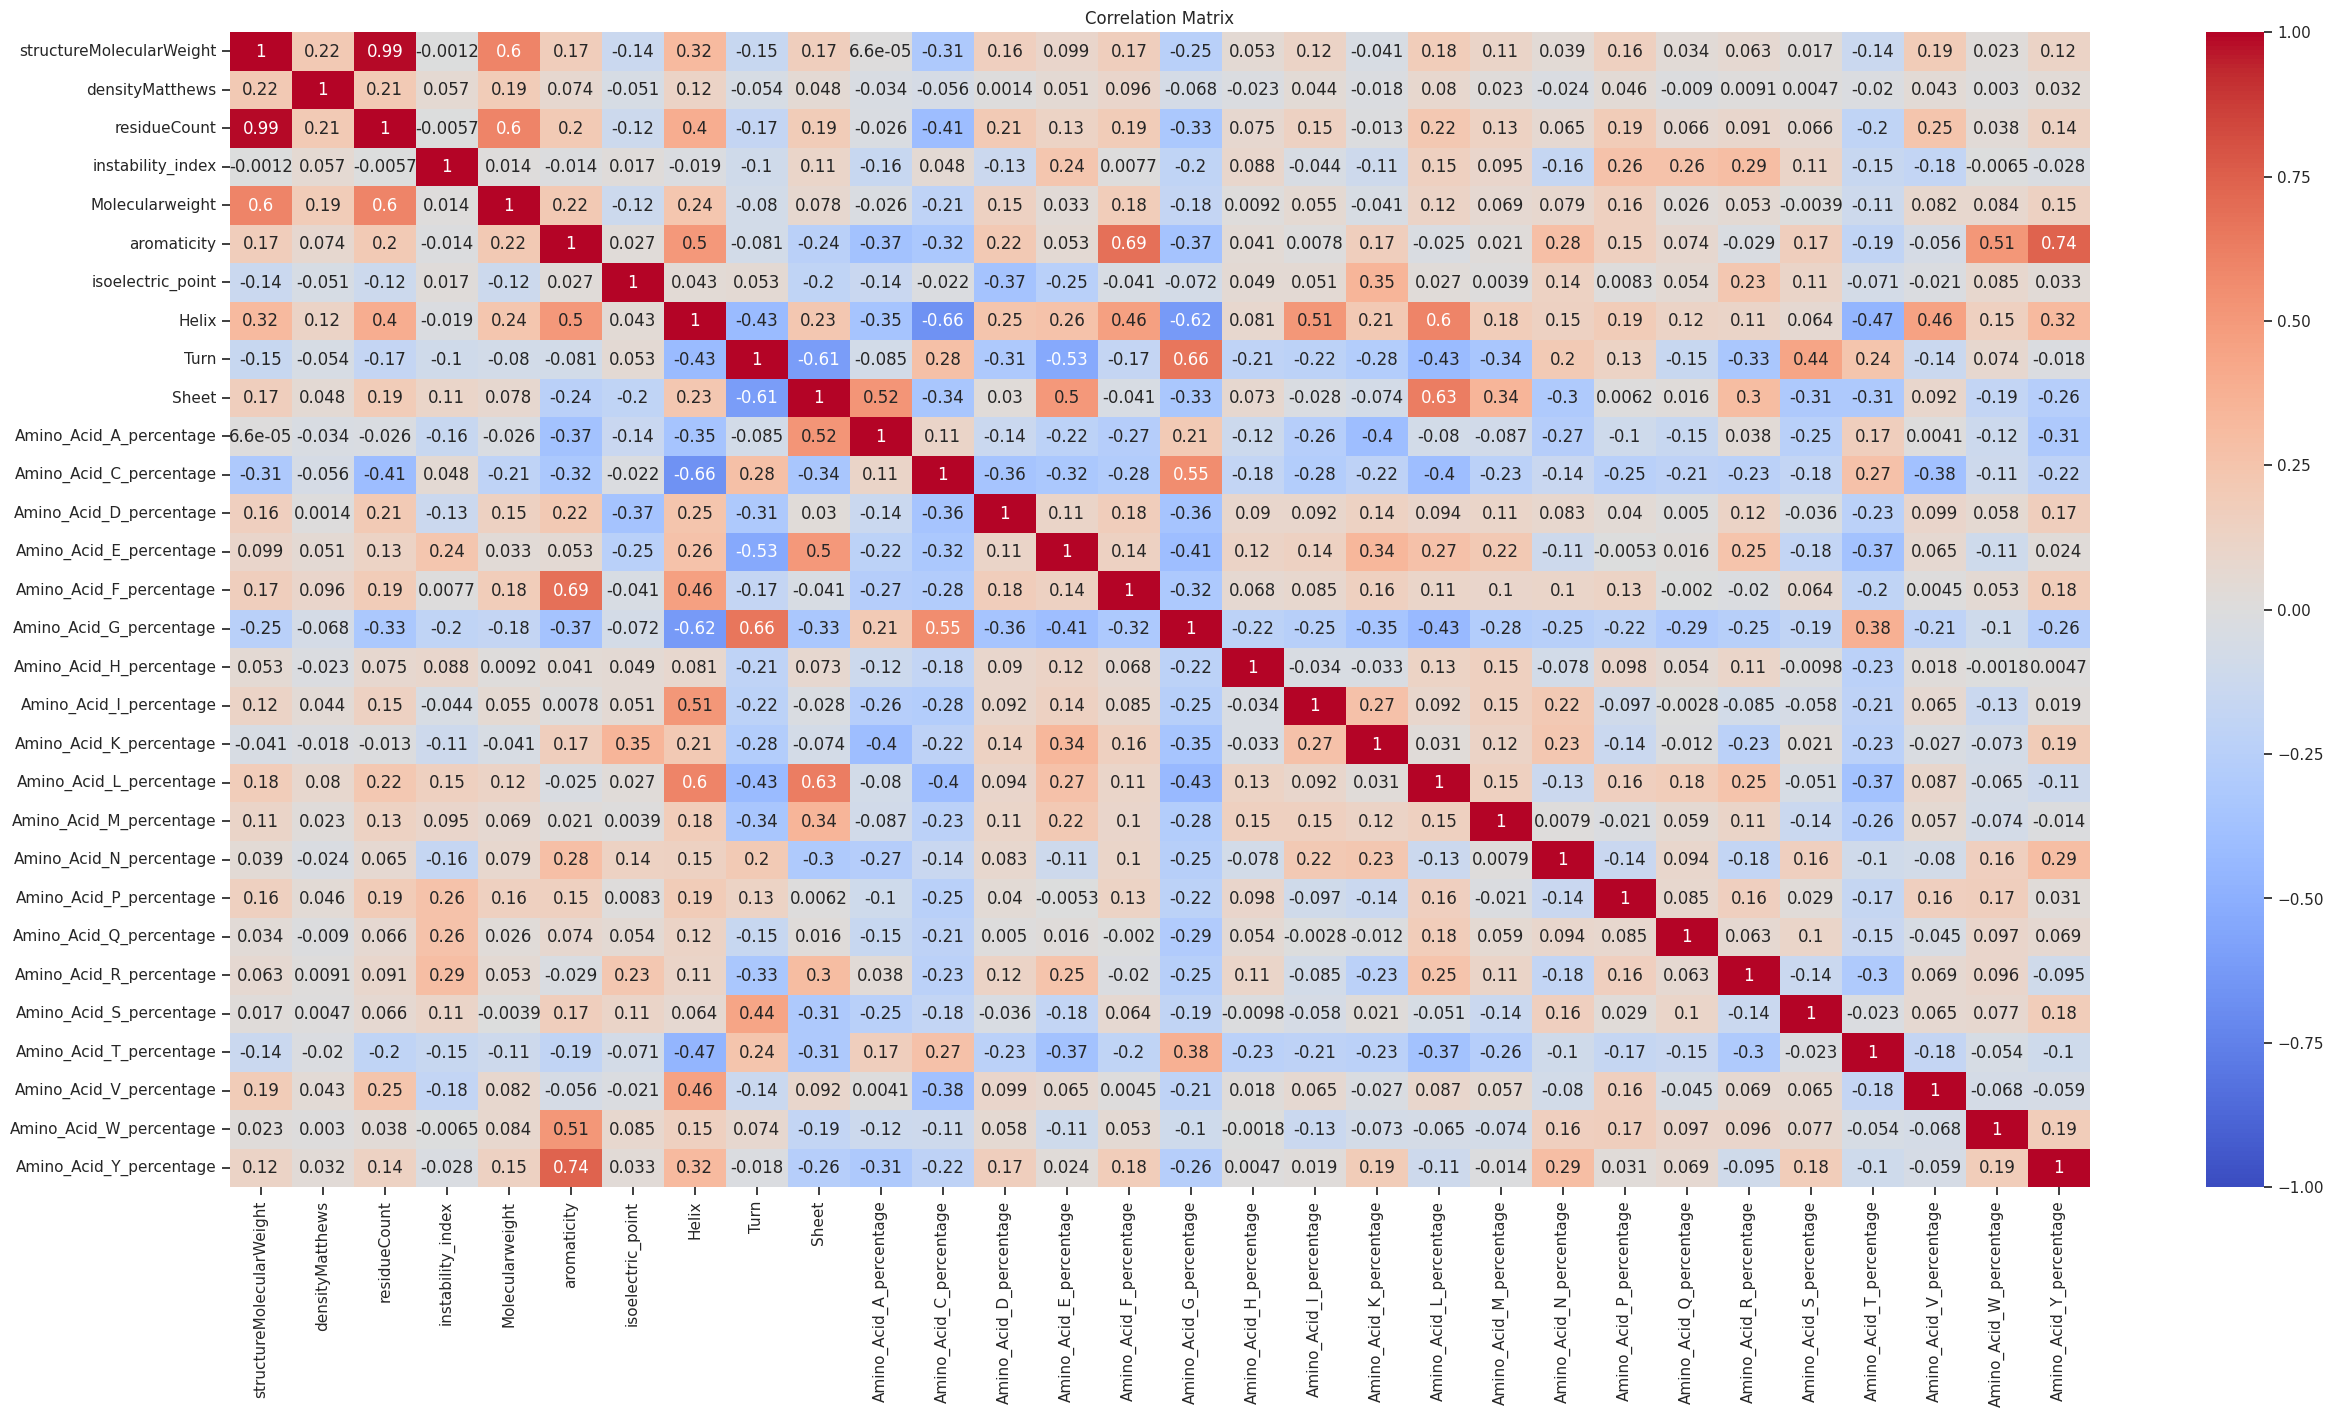

In [ ]:
corr_matrix = df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
graph_cols = ['instability_index', 'Molecularweight', 'aromaticity', 'isoelectric_point',
                  'Helix', 'Turn', 'Sheet', 'Amino_Acid_A_percentage', 'Amino_Acid_C_percentage',
                  'Amino_Acid_D_percentage', 'Amino_Acid_E_percentage', 'Amino_Acid_F_percentage',
                  'Amino_Acid_G_percentage', 'Amino_Acid_H_percentage', 'Amino_Acid_I_percentage',
                  'Amino_Acid_K_percentage', 'Amino_Acid_L_percentage', 'Amino_Acid_M_percentage',
                  'Amino_Acid_N_percentage', 'Amino_Acid_P_percentage', 'Amino_Acid_Q_percentage',
                  'Amino_Acid_R_percentage', 'Amino_Acid_S_percentage', 'Amino_Acid_T_percentage',
                  'Amino_Acid_V_percentage', 'Amino_Acid_W_percentage', 'Amino_Acid_Y_percentage']

# Iterate over numerical columns and plot box plots
for col in graph_cols:
    plt.figure(figsize=(14,7))
    sns.boxplot(y='classification', x=col, data=df)
    plt.title(f'{col} vs Classification', fontsize=14)
    plt.xlabel('Classification', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()


In [ ]:
df.columns

Index(['classification', 'macromoleculeType', 'structureMolecularWeight',
       'densityMatthews', 'sequence', 'residueCount', 'instability_index',
       'Molecularweight', 'aromaticity', 'isoelectric_point', 'Helix', 'Turn',
       'Sheet', 'Amino_Acid_A_percentage', 'Amino_Acid_C_percentage',
       'Amino_Acid_D_percentage', 'Amino_Acid_E_percentage',
       'Amino_Acid_F_percentage', 'Amino_Acid_G_percentage',
       'Amino_Acid_H_percentage', 'Amino_Acid_I_percentage',
       'Amino_Acid_K_percentage', 'Amino_Acid_L_percentage',
       'Amino_Acid_M_percentage', 'Amino_Acid_N_percentage',
       'Amino_Acid_P_percentage', 'Amino_Acid_Q_percentage',
       'Amino_Acid_R_percentage', 'Amino_Acid_S_percentage',
       'Amino_Acid_T_percentage', 'Amino_Acid_V_percentage',
       'Amino_Acid_W_percentage', 'Amino_Acid_Y_percentage'],
      dtype='object')

# 6. **Pre-Processing of Dataset**

In [ ]:
df = df.drop('sequence', axis =1)

## 6.1 Label Encoding the categorical values

The LabelEncoder class is used to transform categorical data into numeric labels. It assigns a unique integer value to each unique category in the column. The encoded labels will range from 0 to n-1, where n is the number of distinct categories in the column.

By encoding categorical columns into numerical labels, it becomes easier to apply machine learning algorithms that require numeric inputs, as these algorithms generally cannot handle categorical data directly. The encoded labels can be used as input features for further analysis, modeling, or other machine learning tasks.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Specify the column name you want to encode
column_name = 'classification'

# Fit label encoder on the column
df[column_name] = label_encoder.fit_transform(df[column_name])

df['macromoleculeType'] = label_encoder.fit_transform(df['macromoleculeType'])

## 6.2 Splitting the data into train, validation and test data

The training set is used to train the model's parameters, allowing it to learn from the provided data. The model learns patterns, relationships, and features from this training set to make predictions or classifications.

The validation set is used to assess the model's performance during the training phase. It is used to fine-tune the model's hyperparameters, such as the learning rate or the number of hidden layers in a neural network. The validation set helps to prevent overfitting by providing an independent dataset that the model has not seen during training.

The testing set, sometimes referred to as the holdout set, is used to assess the final performance of the trained model. It is a completely independent dataset that is not used during the model's training or validation phases.


In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

Splitting the data into training, validation, and testing sets helps ensure that the model is not only accurate on the training data but also performs well on new, unseen data. It allows for better model selection, hyperparameter tuning, and estimation of the model's generalization performance.

Y is the classification column which is the target column.

In [ ]:
Y = df['classification']
X = df.drop('classification', axis=1)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Split the test set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)


In [ ]:
# Print the shapes of the sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Train set shape: (68526, 31) (68526,)
Test set shape: (8566, 31) (8566,)
Validation set shape: (8566, 31) (8566,)


## 6.3 Simple Imputing missing values with the median values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training data by imputing missing values
X_train = imputer.transform(X_train)

X_val = imputer.transform(X_val)

# 7. **Model Building**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import mean_squared_error

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Logistic Regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Make predictions on the validation data
y_preds = logreg.predict(X_val)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_val, y_preds)
print("Accuracy:", accuracy)

# Calculate the F-score on the validation data
f_score = f1_score(y_val, y_preds, average='macro')
print("F-score:", f_score)

# Generate a classification report for the validation data
report = classification_report(y_val, y_preds, target_names=classes, digits=3)
print("Classification Report:")
print(report)

Accuracy: 0.24060238150828858
F-score: 0.06987319017836466
Classification Report:
                                       precision    recall  f1-score   support

                            HYDROLASE      0.829     0.503     0.626       173
                          TRANSFERASE      0.000     0.000     0.000       158
                       OXIDOREDUCTASE      0.279     0.677     0.395      2030
                                LYASE      0.000     0.000     0.000       264
                        IMMUNE SYSTEM      0.000     0.000     0.000       397
                        TRANSCRIPTION      0.000     0.000     0.000       261
                    TRANSPORT PROTEIN      0.000     0.000     0.000       212
                    SIGNALING PROTEIN      0.000     0.000     0.000       449
        HYDROLASE/HYDROLASE INHIBITOR      0.000     0.000     0.000       160
                            ISOMERASE      0.000     0.000     0.000      1159
                        VIRAL PROTEIN      0.000

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the validation data
y_preds = rf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_preds)
print("Accuracy:", accuracy)

# Get F Score
print("F score:", f1_score(y_val, y_preds, average='macro'))

# Calculate the RMSE score
rmse = mean_squared_error(y_val, y_preds, squared=False)
print("RMSE score:", rmse)

# Generate a classification report
report = classification_report(y_val, y_preds, target_names=classes, digits=3)
print("Classification Report:")
print(report)

Accuracy: 0.7878823254727995
F score: 0.734437753627977
RMSE score: 3.4949681984793477
Classification Report:
                                       precision    recall  f1-score   support

                            HYDROLASE      1.000     1.000     1.000       173
                          TRANSFERASE      0.772     0.494     0.602       158
                       OXIDOREDUCTASE      0.732     0.886     0.801      2030
                                LYASE      0.746     0.678     0.710       264
                        IMMUNE SYSTEM      0.905     0.864     0.884       397
                        TRANSCRIPTION      0.955     0.739     0.834       261
                    TRANSPORT PROTEIN      0.942     0.684     0.792       212
                    SIGNALING PROTEIN      0.935     0.766     0.842       449
        HYDROLASE/HYDROLASE INHIBITOR      0.816     0.637     0.716       160
                            ISOMERASE      0.875     0.890     0.882      1159
                    

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Make predictions on the validation data
y_preds = dt.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_preds)
print("Accuracy:", accuracy)

# Get F Score
print("F score:", f1_score(y_val, y_preds, average='macro'))

# Calculate the RMSE score
rmse = mean_squared_error(y_val, y_preds, squared=False)
print("RMSE score:", rmse)

# Generate a classification report
report = classification_report(y_val, y_preds, target_names=classes, digits=3)
print("Classification Report:")
print(report)

Accuracy: 0.7145692271772123
F score: 0.6362416939500956
RMSE score: 3.853507670101389
Classification Report:
                                       precision    recall  f1-score   support

                            HYDROLASE      0.994     0.994     0.994       173
                          TRANSFERASE      0.477     0.386     0.427       158
                       OXIDOREDUCTASE      0.787     0.778     0.783      2030
                                LYASE      0.627     0.682     0.653       264
                        IMMUNE SYSTEM      0.794     0.806     0.800       397
                        TRANSCRIPTION      0.665     0.693     0.679       261
                    TRANSPORT PROTEIN      0.592     0.623     0.607       212
                    SIGNALING PROTEIN      0.740     0.748     0.744       449
        HYDROLASE/HYDROLASE INHIBITOR      0.592     0.544     0.567       160
                            ISOMERASE      0.813     0.812     0.813      1159
                    

# Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an Extra Trees classifier
et = ExtraTreesClassifier()

# Fit the classifier to the training data
et.fit(X_train, y_train)

# Make predictions on the validation data
y_preds = et.predict(X_val)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_val, y_preds)
print("Accuracy:", accuracy)

# Calculate the F-score on the validation data
f_score = f1_score(y_val, y_preds, average='macro')
print("F-score:", f_score)

# Calculate the RMSE score (N/A for classification)
rmse = mean_squared_error(y_val, y_preds, squared=False)
print("RMSE score:", rmse)

# Generate a classification report for the validation data
report = classification_report(y_val, y_preds, target_names=classes, digits=3)
print("Classification Report:")
print(report)

Accuracy: 0.7905673593275742
F-score: 0.7404251221999308
RMSE score: 3.4929300529629033
Classification Report:
                                       precision    recall  f1-score   support

                            HYDROLASE      1.000     0.994     0.997       173
                          TRANSFERASE      0.784     0.481     0.596       158
                       OXIDOREDUCTASE      0.733     0.886     0.802      2030
                                LYASE      0.729     0.693     0.711       264
                        IMMUNE SYSTEM      0.909     0.856     0.882       397
                        TRANSCRIPTION      0.975     0.736     0.838       261
                    TRANSPORT PROTEIN      0.934     0.665     0.777       212
                    SIGNALING PROTEIN      0.961     0.771     0.855       449
        HYDROLASE/HYDROLASE INHIBITOR      0.831     0.675     0.745       160
                            ISOMERASE      0.874     0.896     0.885      1159
                   

# XG Boost

In [ ]:
%%time
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_preds = xgb_classifier.predict(X_val)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_val, y_preds)
print("Accuracy:", accuracy)

# Calculate the F-score on the validation data
f_score = f1_score(y_val, y_preds, average='macro')
print("F-score:", f_score)

# Calculate the RMSE score (N/A for classification)
rmse = mean_squared_error(y_val, y_preds, squared=False)
print("RMSE score:", rmse)

# Generate a classification report for the validation data
report = classification_report(y_val, y_preds, target_names=classes, digits=3)
print("Classification Report:")
print(report)


Accuracy: 0.7270604716320336
F-score: 0.6742337188291478
RMSE score: 3.8924965384559043
Classification Report:
                                       precision    recall  f1-score   support

                            HYDROLASE      1.000     0.994     0.997       173
                          TRANSFERASE      0.700     0.443     0.543       158
                       OXIDOREDUCTASE      0.703     0.833     0.762      2030
                                LYASE      0.734     0.523     0.611       264
                        IMMUNE SYSTEM      0.897     0.851     0.873       397
                        TRANSCRIPTION      0.918     0.682     0.782       261
                    TRANSPORT PROTEIN      0.863     0.594     0.704       212
                    SIGNALING PROTEIN      0.897     0.639     0.746       449
        HYDROLASE/HYDROLASE INHIBITOR      0.744     0.619     0.676       160
                            ISOMERASE      0.767     0.825     0.795      1159
                   

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the validation data
y_preds = knn.predict(X_val)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_val, y_preds)
print("Accuracy:", accuracy)

# Calculate the F-score on the validation data
f_score = f1_score(y_val, y_preds, average='macro')
print("F-score:", f_score)

# Calculate the RMSE score (N/A for classification)
rmse = mean_squared_error(y_val, y_preds, squared=False)
print("RMSE score:", rmse)

# Generate a classification report for the validation data
report = classification_report(y_val, y_preds, target_names=classes, digits=3)
print("Classification Report:")
print(report)

Accuracy: 0.4970814849404623
F-score: 0.4158357720191422
RMSE score: 5.441085991229187
Classification Report:
                                       precision    recall  f1-score   support

                            HYDROLASE      0.899     0.983     0.939       173
                          TRANSFERASE      0.241     0.348     0.285       158
                       OXIDOREDUCTASE      0.506     0.676     0.579      2030
                                LYASE      0.504     0.511     0.508       264
                        IMMUNE SYSTEM      0.452     0.481     0.466       397
                        TRANSCRIPTION      0.404     0.345     0.372       261
                    TRANSPORT PROTEIN      0.337     0.283     0.308       212
                    SIGNALING PROTEIN      0.490     0.430     0.458       449
        HYDROLASE/HYDROLASE INHIBITOR      0.339     0.237     0.279       160
                            ISOMERASE      0.540     0.548     0.544      1159
                    

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Bagging classifier
bagging = BaggingClassifier()

# Fit the classifier to the training data
bagging.fit(X_train, y_train)

# Make predictions on the validation data
y_preds = bagging.predict(X_val)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_val, y_preds)
print("Accuracy:", accuracy)

# Calculate the F-score on the validation data
f_score = f1_score(y_val, y_preds, average='macro')
print("F-score:", f_score)

# Calculate the RMSE score (not applicable for classification)
rmse = mean_squared_error(y_val, y_preds, squared=False)
print("RMSE score:", rmse)

# Generate a classification report for the validation data
report = classification_report(y_val, y_preds, target_names=classes, digits=3)
print("Classification Report:")
print(report)
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Accuracy: 0.7584636936726593
F-score: 0.6909089430314054
RMSE score: 3.6658210841965793
Classification Report:
                                       precision    recall  f1-score   support

                            HYDROLASE      0.994     0.994     0.994       173
                          TRANSFERASE      0.532     0.468     0.498       158
                       OXIDOREDUCTASE      0.726     0.862     0.788      2030
                                LYASE      0.720     0.670     0.694       264
                        IMMUNE SYSTEM      0.845     0.811     0.828       397
                        TRANSCRIPTION      0.835     0.739     0.785       261
                    TRANSPORT PROTEIN      0.804     0.679     0.737       212
                    SIGNALING PROTEIN      0.846     0.746     0.793       449
        HYDROLASE/HYDROLASE INHIBITOR      0.681     0.588     0.631       160
                            ISOMERASE      0.836     0.871     0.853      1159
                   

# LightGBM Classifier

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier()

# Fit the classifier to the training data
lgb_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_preds = lgb_classifier.predict(X_val)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_val, y_preds)
print("Accuracy:", accuracy)

# Get F Score
print("F score:", f1_score(y_val, y_preds, average='macro'))

# Calculate the RMSE score (not applicable for classification)
rmse = mean_squared_error(y_val, y_preds, squared=False)
print("RMSE score:", rmse)

# Generate a classification report for the validation data
report = classification_report(y_val, y_preds, target_names=classes, digits=3)
print("Classification Report:")
print(report)



Accuracy: 0.6936726593509223
F score: 0.6420639921842656
RMSE score: 4.171353111996611
Classification Report:
                                       precision    recall  f1-score   support

                            HYDROLASE      0.994     0.994     0.994       173
                          TRANSFERASE      0.636     0.430     0.513       158
                       OXIDOREDUCTASE      0.678     0.801     0.734      2030
                                LYASE      0.730     0.523     0.609       264
                        IMMUNE SYSTEM      0.865     0.824     0.844       397
                        TRANSCRIPTION      0.874     0.586     0.702       261
                    TRANSPORT PROTEIN      0.778     0.594     0.674       212
                    SIGNALING PROTEIN      0.880     0.604     0.716       449
        HYDROLASE/HYDROLASE INHIBITOR      0.698     0.562     0.623       160
                            ISOMERASE      0.730     0.784     0.756      1159
                    

We will be using the ExtraTreesClassifier model to hyperparameter tune as it had a good F score of **0.7382248321589564** on the validation dataset.

# 8. **Hyperparameter Tuning**




Hyperparameter tuning refers to the process of selecting the best set of hyperparameters for a machine learning model. Hyperparameters are configuration settings that are not learned from the data, but rather set by the user before training the model. Examples of hyperparameters include learning rate, number of hidden layers in a neural network, regularization strength, etc.

Hyperparameter tuning is important because the performance of a machine learning model can vary significantly with different hyperparameter values. By tuning the hyperparameters, we aim to find the optimal combination that yields the best performance on the given dataset.


The function test_params is used to test different sets of parameters for a given model. It takes the following inputs:

model: The machine learning model object.
train_inputs: The input features of the training data.
train_targets: The target labels of the training data.
val_inputs: The input features of the validation data.
val_targets: The target labels of the validation data.
**params: Additional keyword arguments representing the parameters to be set for the model.


In [ ]:
def test_params(model, train_inputs, train_targets, val_inputs, val_targets, **params):
    # Setting the params of
    model.set_params(**params)

    # Fitting the model with the params
    model.fit(train_inputs, train_targets)

    # Getting the training and validation accuracy scores
    train_f1 = f1_score(model.predict(train_inputs), train_targets, average='micro')
    val_f1 = f1_score(model.predict(val_inputs), val_targets, average='micro')
    return train_f1, val_f1

The test_param_and_plot function is a utility for hyperparameter tuning and visualization. It takes a model, training and validation data, previous best parameter values, a parameter name, and a list of parameter values.

The function evaluates the model's performance with each parameter value by setting the parameter, fitting the model, and computing training and validation accuracy scores. The scores are collected in a list of dictionaries called accuracies_list.

A line chart is plotted to visualize the accuracy scores as a function of the parameter values, helping identify overfitting or underfitting patterns. The function returns the accuracies_list containing the parameter values and corresponding accuracy scores.

This function is valuable for comparing parameter impacts, selecting the best value based on validation scores, and gaining insights into the model's performance.

In [ ]:
def test_param_and_plot(model, train_inputs, train_targets, val_inputs, val_targets, older_param, param_name, param_values):
    # creating training and validation accuracy lists
    train_accuracy, val_accuracy = [], []

    # creating the accuracy list
    accuracies_list = []

    # setting the values of the paramters which have been found to work the best
    for key, value in older_param.items():
            setattr(model, key, value)

    # running the for loop over list of param values
    for value in param_values:
        params = {param_name: value}

        # creating the dictionary to be returned in the end
        accuracies = {}
        # running the test param function and getting back the train and validation accuracy scores
        train_f, val_f = test_params(model, train_inputs, train_targets, val_inputs, val_targets, **params)
        train_accuracy.append(train_f)
        val_accuracy.append(val_f)

        # adding items to the dictionary
        accuracies['param'] =    param_name
        accuracies['param_value'] = value
        accuracies['train_score'] = train_f
        accuracies['val_score'] = val_f
        accuracies_list.append(accuracies)

    # plotting a line chart of train and validation accuracy scores
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accuracy, 'b-o')
    plt.plot(param_values, val_accuracy, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])

    return accuracies_list

## 8.1 Hyperparameter tuning ExtraTreesClassifier

The ExtraTreesClassifier is a machine learning model that belongs to the ensemble learning family. It is an extension of the Random Forest algorithm and is commonly used for classification tasks.

`n_estimators:` The number of decision trees in the ensemble. Increasing this parameter can improve the model's performance, but it also increases computation time.

`criterion:` The function to measure the quality of a split. Common options are "gini" for the Gini impurity and "entropy" for the information gain.

`max_depth:` The maximum depth of the decision trees. Limiting the depth can help prevent overfitting.

`min_samples_split:` The minimum number of samples required to split an internal node. Setting a higher value can prevent overfitting.

`min_samples_leaf:` The minimum number of samples required to be at a leaf node. Similar to min_samples_split, it helps control overfitting.

`max_features:` The number of features to consider when looking for the best split. Options include "auto" (sqrt(n_features)), "sqrt" (sqrt(n_features)), "log2" (log2(n_features)), or an integer value.

`bootstrap:` Whether to use bootstrap samples when building decision trees. By default, it is set to True.

`random_state:` The seed value for random number generation. It ensures reproducibility of the model's results.

In [ ]:
ExtraTreesClassifier().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# creating a dictionary with some parameters which will get more arguments later on
good_params = {}

[{'param': 'n_estimators',
  'param_value': 100,
  'train_score': 0.9994892449581181,
  'val_score': 0.7872986224608919},
 {'param': 'n_estimators',
  'param_value': 200,
  'train_score': 0.9994892449581181,
  'val_score': 0.7906840999299556},
 {'param': 'n_estimators',
  'param_value': 300,
  'train_score': 0.9994892449581181,
  'val_score': 0.7895166939061405},
 {'param': 'n_estimators',
  'param_value': 400,
  'train_score': 0.9994892449581181,
  'val_score': 0.7897501751109037},
 {'param': 'n_estimators',
  'param_value': 500,
  'train_score': 0.9994892449581181,
  'val_score': 0.7933691337847303}]

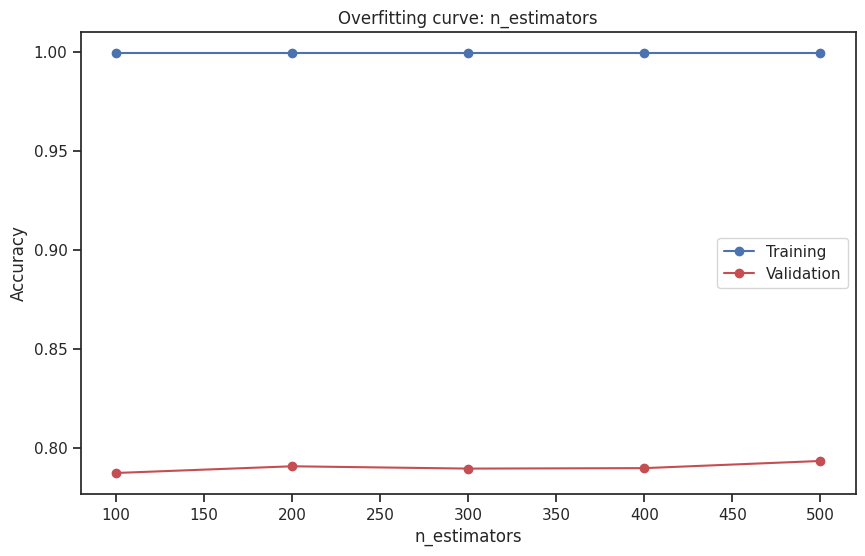

In [ ]:
test_param_and_plot(et, X_train, y_train, X_val, y_val, good_params,  'n_estimators', [100,200,300,400,500])

In [ ]:
good_params['n_estimators'] = 300

[{'param': 'max_features',
  'param_value': 'sqrt',
  'train_score': 0.9994892449581181,
  'val_score': 0.7906840999299556},
 {'param': 'max_features',
  'param_value': 'log2',
  'train_score': 0.9994892449581181,
  'val_score': 0.7885827690870885},
 {'param': 'max_features',
  'param_value': 10,
  'train_score': 0.9994892449581181,
  'val_score': 0.7946532804109269},
 {'param': 'max_features',
  'param_value': 20,
  'train_score': 0.9994892449581181,
  'val_score': 0.7938360961942562},
 {'param': 'max_features',
  'param_value': 30,
  'train_score': 0.9994892449581181,
  'val_score': 0.7972215736633201},
 {'param': 'max_features',
  'param_value': 40,
  'train_score': 0.9994892449581181,
  'val_score': 0.7962876488442681},
 {'param': 'max_features',
  'param_value': 50,
  'train_score': 0.9994892449581181,
  'val_score': 0.7964043894466496}]

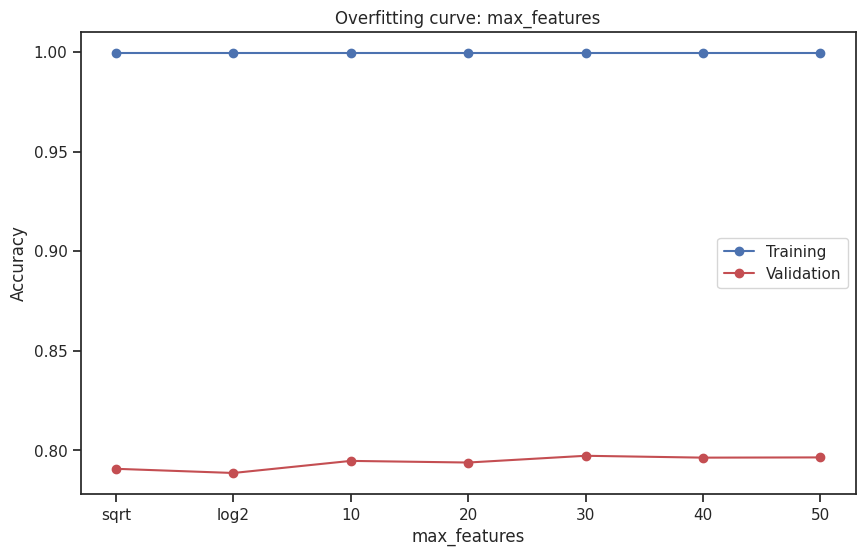

In [ ]:
test_param_and_plot(et, X_train, y_train, X_val, y_val, good_params, 'max_features', ['sqrt', 'log2',  10, 20, 30,40,50])

In [ ]:
good_params['max_features'] =  30

In [ ]:
good_params

{'n_estimators': 300, 'max_features': 30}